In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import resample
import seaborn as sns

In [2]:
chip1_data_acetone_1M = pd.read_csv('../data/Data collection/Chip-1/Acetone_1ppm_1M_300.csv', sep=';', decimal=',')
chip1_data_acetone_100k = pd.read_csv('../data/Data collection/Chip-1/Acetone_1ppm_100k_300.csv', sep=';', decimal=',')
chip1_data_benzene_1M = pd.read_csv('../data/Data collection/Chip-1/Benzene_1.008ppm_1M_300.csv', sep=';', decimal=',')
chip1_data_benzene_100k = pd.read_csv('../data/Data collection/Chip-1/Benzene_1.008ppm_100k_300.csv', sep=';', decimal=',')
chip1_data_methanol_1M = pd.read_csv('../data/Data collection/Chip-1/Methanol_1.04ppm_1M_300.csv', sep=';', decimal=',')
chip1_data_methanol_100k = pd.read_csv('../data/Data collection/Chip-1/Methanol_1.04ppm_100k_300.csv', sep=';', decimal=',')
chip1_data_ethanol_1M = pd.read_csv('../data/Data collection/Chip-1/Ethanol_1.001ppm_1M_300.csv', sep=';', decimal=',')
chip1_data_ethanol_100k = pd.read_csv('../data/Data collection/Chip-1/Ethanol_1.001ppm_100k_300.csv', sep=';', decimal=',')
chip1_data_ipa_1M = pd.read_csv('../data/Data collection/Chip-1/IPA_1.008ppm_1M_300.csv', sep=';', decimal=',')
chip1_data_ipa_100k = pd.read_csv('../data/Data collection/Chip-1/IPA_1.008ppm_100k_300.csv', sep=';', decimal=',')

In [140]:
chip2_data_acetone_1M = pd.read_csv('../data/Data collection/Chip-2/Acetone_1ppm_1M_300.csv', sep=';', decimal=',')
chip2_data_acetone_100k = pd.read_csv('../data/Data collection/Chip-2/Acetone_1ppm_100k_300.csv', sep=';', decimal=',')
chip2_data_acetone_10k = pd.read_csv('../data/Data collection/Chip-2/Acetone_1ppm_10k_300.csv', sep=';', decimal=',')
chip2_data_benzene_1M = pd.read_csv('../data/Data collection/Chip-2/Benzene_1.008ppm_1M_300.csv', sep=';', decimal=',')
chip2_data_benzene_100k = pd.read_csv('../data/Data collection/Chip-2/Benzene_1.008ppm_100k_300.csv', sep=';', decimal=',')
chip2_data_benzene_10k = pd.read_csv('../data/Data collection/Chip-2/Benzene_1.008ppm_10k_300.csv', sep=';', decimal=',')
chip2_data_methanol_1M = pd.read_csv('../data/Data collection/Chip-2/Methanol_1.001ppm_1M_300.csv', sep=';', decimal=',')
chip2_data_methanol_100k = pd.read_csv('../data/Data collection/Chip-2/Methanol_1.001ppm_100k_300.csv', sep=';', decimal=',')
chip2_data_methanol_10k = pd.read_csv('../data/Data collection/Chip-2/Methanol_1.001ppm_10k_300.csv', sep=';', decimal=',')
chip2_data_ethanol_1M = pd.read_csv('../data/Data collection/Chip-2/Ethanol_1.001ppm_1M_300.csv', sep=';', decimal=',')
chip2_data_ethanol_100k = pd.read_csv('../data/Data collection/Chip-2/Ethanol_1.001ppm_100k_300.csv', sep=';', decimal=',')
chip2_data_ethanol_10k = pd.read_csv('../data/Data collection/Chip-2/Ethanol_1.001ppm_10k_300.csv', sep=';', decimal=',')
chip2_data_ipa_1M = pd.read_csv('../data/Data collection/Chip-2/IPA_1.008ppm_1M_300.csv', sep=';', decimal=',')
chip2_data_ipa_100k = pd.read_csv('../data/Data collection/Chip-2/IPA_1.008ppm_100k_300.csv', sep=';', decimal=',')
chip2_data_ipa_10k = pd.read_csv('../data/Data collection/Chip-2/IPA_1.008ppm_10k_300.csv', sep=';', decimal=',')

In [141]:
chip3_data_acetone_1M = pd.read_csv('../data/Data collection/Chip-3/Acetone_1ppm_1M_300.csv', sep=';', decimal=',')
chip3_data_benzene_1M = pd.read_csv('../data/Data collection/Chip-3/Benzene_1.008ppm_1M_300.csv', sep=';', decimal=',')
chip3_data_methanol_1M = pd.read_csv('../data/Data collection/Chip-3/Methanol_1.001ppm_1M_300.csv', sep=';', decimal=',')
chip3_data_ethanol_1M = pd.read_csv('../data/Data collection/Chip-3/Ethanol_1.001ppm_1M_300.csv', sep=';', decimal=',')
chip3_data_ipa_1M = pd.read_csv('../data/Data collection/Chip-3/IPA_1.008ppm_1M_300.csv', sep=';', decimal=',')

In [142]:
cols = [ 'nico', 'nio5', 'ceo', 'coo', 'nio1', 'nio2', 'nio3', 'nio4', 'azo25', 'azo50', 'v2o55', 'v2o510', 'v2o550', 'v2o5', 'ito', 'zzo', 'azo1', 'azo6', 'azo7', 'gzo21',]
def filt_sig(signal, const, threshold, win1=None, signal_cuts=None, win2=None, sig_plot=False):
    Y = np.fft.fft(signal)
    Y_filtered = Y.copy()
    Y_filtered[np.abs(np.fft.fftfreq(len(signal), d=1.0/const)) > threshold] = 0
    y_filtered = np.real(np.fft.ifft(Y_filtered))
    ma = y_filtered
    if win1!=None:
        ma = np.array(pd.DataFrame(ma).rolling(win1).mean().dropna()).squeeze()
    if signal_cuts!=None:
        ma = ma[ma<signal_cuts[0]]
        ma = ma[ma>signal_cuts[1]]
    if win2!=None:
        ma = np.array(pd.DataFrame(ma).rolling(win2).mean().dropna()).squeeze()
    if sig_plot:
        fig, axs = plt.subplots(1, 2, figsize=(10,3))
        axs = axs.flatten()
        plt.figure(figsize=(10, 6))
        axs[0].plot(signal)
        axs[0].plot(y_filtered)
        axs[0].plot(ma)
        axs[1].plot(ma)
        plt.show()
    return ma

def scatter_plot(data):
    plt.scatter(range(len(data)), data)

def prepareData(analyte, cols=cols):
    if analyte.lower()=='acetone':
        data1 = chip1_data_acetone_1M[['R8', 'R9', 'R15']][:4000]
        data1 = data1[data1['R8']<2300]
        data1 = data1[data1['R8']>1300]
        data1 = data1[data1['R15']<1400]
        data1 = data1.reset_index().drop('index', axis=1).squeeze()
        data2 = chip1_data_acetone_100k[['R17', 'R14', 'R13', 'R12', 'R11']][:4000]
        data3 = chip2_data_acetone_1M[['R14', 'R13']][:700]
        data4 = chip2_data_acetone_10k[['R10', 'R9', 'R7', 'R11']][:700]
        data5 = chip3_data_acetone_1M[['R9', 'R3', 'R13', 'R11', 'R7', 'R15']]
        data5 = data5[data5['R3']<1600]
        data5 = data5[data5['R3']>1100]
        data5 = data5[data5['R11']<565]
        data5 = data5[data5['R11']>500]
        data5 = data5[data5['R15']<345]
        data5 = data5[data5['R15']>305]
        data5 = data5[:700]
        data5 = data5.reset_index().drop('index', axis=1).squeeze()


        data1 = pd.DataFrame(resample(data1, len(data3)), columns=data1.columns)
        data2 = pd.DataFrame(resample(data2, len(data3)), columns=data2.columns)

        acetone_data = pd.concat([data1, data2, data3, data4, data5], ignore_index=True, axis=1)
        acetone_data.columns = cols
        acetone_data['ceo'] = filt_sig(acetone_data['ceo'], 400, 50)
        acetone_data['gzo21'] = filt_sig(acetone_data['gzo21'], 500, 30)

        fin = acetone_data

    elif analyte.lower()=='benzene':
        data1 = chip1_data_benzene_1M[['R8', 'R9', 'R15']][:4000]
        data1 = data1[data1['R8']<10000]
        data1 = data1[data1['R9']<1400]
        data1 = data1[data1['R15']<2500]
        data1 = data1.reset_index().drop('index', axis=1).squeeze()
        data2 = chip1_data_benzene_100k[['R17', 'R14', 'R13', 'R12', 'R11']]
        data3 = chip2_data_benzene_1M[['R14', 'R13']][500:]
        data3 = data3[data3['R13']<325]
        data3 = data3.reset_index().drop('index', axis=1).squeeze()
        data4 = chip2_data_benzene_10k[['R10', 'R9', 'R7', 'R11']][:4000]
        data5 = chip3_data_benzene_1M[['R9', 'R3', 'R13', 'R11', 'R7', 'R15']]
        data5 = data5[data5['R3']<1800]
        data5 = data5[data5['R3']>1300]
        data5 = data5[data5['R11']<580]
        data5 = data5[data5['R11']>500]
        data5 = data5[data5['R15']<350]
        data5 = data5[data5['R15']>329]
        data5 = data5.reset_index().drop('index', axis=1).squeeze()
        data5 = data5[:700]

        data1.replace([np.inf, -np.inf], np.nan, inplace=True) 
        data1.dropna(inplace=True)

        data1 = pd.DataFrame(resample(data1, len(data5)), columns=data1.columns)
        data2 = pd.DataFrame(resample(data2, len(data5)), columns=data2.columns)
        data3 = pd.DataFrame(resample(data3, len(data5)), columns=data3.columns)
        data4 = pd.DataFrame(resample(data4, len(data5)), columns=data4.columns)

        benzene_data = pd.concat([data1, data2, data3, data4, data5], ignore_index=True, axis=1)
        benzene_data.columns = cols
        benzene_data['nico'] = filt_sig(benzene_data['nico'], 1000, 30)
        benzene_data['nio5'] = filt_sig(benzene_data['nio5'], 1000, 30)
        benzene_data['ceo'] = filt_sig(benzene_data['ceo'], 1000, 30)
        benzene_data['gzo21'] = filt_sig(benzene_data['gzo21'], 600, 50)

        fin = benzene_data
    
    elif analyte.lower()=='methanol':
        data1 = chip1_data_methanol_1M[['R8', 'R9', 'R15']][:5000]
        data1 = data1[data1['R8']<2000]
        data1 = data1[data1['R8']>1200]
        data2 = chip1_data_methanol_100k[['R17', 'R14', 'R13', 'R12', 'R11']][:5000]
        data3 = chip2_data_methanol_1M[['R14', 'R13']][:700]
        data4 = chip2_data_methanol_10k[['R10', 'R9', 'R7', 'R11']]
        data5 = chip3_data_methanol_1M[['R9', 'R3', 'R13', 'R11', 'R7', 'R15']]
        data5 = data5[data5['R3']<2200]
        data5 = data5[data5['R3']>1400]
        data5 = data5[data5['R11']<600]
        data5 = data5[data5['R11']>500]
        data5 = data5[data5['R15']<400]
        data5 = data5[data5['R15']>350]
        data5 = data5.reset_index().drop('index', axis=1).squeeze()
        data5 = data5[:700]

        data1 = pd.DataFrame(resample(data1, len(data5)), columns=data1.columns)
        data2 = pd.DataFrame(resample(data2, len(data5)), columns=data2.columns)
        data4 = pd.DataFrame(resample(data4, len(data5)), columns=data4.columns)

        methanol_data = pd.concat([data1, data2, data3, data4, data5], ignore_index=True, axis=1)
        methanol_data.columns = cols

        methanol_data['zzo'] = filt_sig(methanol_data['zzo'], 700, 50)
        replacement = methanol_data['zzo'][methanol_data['zzo']>1500]
        replacement = replacement.reset_index().drop('index', axis=1).squeeze()
        methanol_data['zzo'] = resample(replacement, 700)

        fin = methanol_data
    
    elif analyte.lower()=='ethanol':
        data1 = chip1_data_ethanol_1M[['R8', 'R9', 'R15']][:5000]
        data1 = data1[data1['R8']<2500]
        data1 = data1[data1['R8']>1500]
        data1 = data1[data1['R15']<1200]
        data1 = data1[data1['R15']>600]
        data1 = data1.reset_index().drop('index', axis=1).squeeze()
        data2 = chip1_data_ethanol_100k[['R17', 'R14', 'R13', 'R12', 'R11']]
        data3 = chip2_data_ethanol_1M[['R14', 'R13']]
        data3 = data3[data3['R13']<350]
        data3 = data3[data3['R13']>305]
        data3 = data3.reset_index().drop('index', axis=1).squeeze()
        data4 = chip2_data_ethanol_10k[['R10', 'R9', 'R7', 'R11']][:600]
        data5 = chip3_data_ethanol_1M[['R9', 'R3', 'R13', 'R11', 'R7', 'R15']]
        data5 = data5[data5['R3']<2000]
        data5 = data5[data5['R3']>1400]
        data5 = data5[data5['R11']<560]
        data5 = data5[data5['R11']>505]
        data5 = data5[data5['R15']<395]
        data5 = data5[data5['R15']>350]
        data5 = data5.reset_index().drop('index', axis=1).squeeze()
        data5 = data5[50:750]
        data5 = data5.reset_index().drop('index', axis=1).squeeze()

        data1 = pd.DataFrame(resample(data1, 700), columns=data1.columns)
        data2 = pd.DataFrame(resample(data2, 700), columns=data2.columns)
        data3 = pd.DataFrame(resample(data3, 700), columns=data3.columns)
        data4 = pd.DataFrame(resample(data4, 700), columns=data4.columns)
        data5 = pd.DataFrame(resample(data5, 700), columns=data5.columns)

        ethanol_data = pd.concat([data1, data2, data3, data4, data5], ignore_index=True, axis=1)
        ethanol_data.columns = cols

        fin = ethanol_data
    
    elif analyte.lower()=='isopropanol':
        data1 = chip1_data_ipa_1M[['R8', 'R9', 'R15']][:5000]
        data1 = data1[data1['R8']<2500]
        data1 = data1[data1['R15']<1100]
        data1 = data1[data1['R15']>550]
        data1 = data1.reset_index().drop('index', axis=1).squeeze()
        data2 = chip1_data_ipa_100k[['R17', 'R14', 'R13', 'R12', 'R11']][1000:6000]
        data2 = data2[data2['R11']<32]
        data2 = data2[data2['R11']>31]
        data2 = data2.reset_index().drop('index', axis=1).squeeze()
        data3 = chip2_data_ipa_1M[['R14', 'R13']]
        data3 = data3[data3['R13']<340]
        data3 = data3.reset_index().drop('index', axis=1).squeeze()
        data3 = data3[:700]
        data4 = chip2_data_ipa_10k[['R10', 'R9', 'R7', 'R11']][:675]
        data5 = chip3_data_ipa_1M[['R9', 'R3', 'R13', 'R11', 'R7', 'R15']]
        data5 = data5[data5['R3']<2200]
        data5 = data5[data5['R11']<590]
        data5 = data5[data5['R11']>490]
        data5 = data5[data5['R15']<405]
        data5 = data5[data5['R15']>355]
        data5 = data5.reset_index().drop('index', axis=1).squeeze()
        data5 = data5[:700]

        data1 = pd.DataFrame(resample(data1, len(data5)), columns=data1.columns)
        data2 = pd.DataFrame(resample(data2, len(data5)), columns=data2.columns)
        data4 = pd.DataFrame(resample(data4, len(data5)), columns=data4.columns)

        ipa_data = pd.concat([data1, data2, data3, data4, data5], ignore_index=True, axis=1)
        ipa_data.columns = cols

        ipa_data['zzo'] = filt_sig(ipa_data['zzo'], 900, 50)
        ipa_data['azo6'] = filt_sig(ipa_data['azo6'], 500, 25)
        replacement = filt_sig(ipa_data['gzo21'], 500, 20, win1=40)
        ipa_data['gzo21'] = resample(replacement, 700)

        fin = ipa_data

    return fin


def resplot(data):
    res_data = np.zeros(shape=(len(data), 1))
    for i in range(8):
        val1 = data.iloc[:,i][:20].mean()
        new = np.array((data.iloc[:,i] - val1)/data.iloc[:,i]).reshape(-1,1)
        res_data = np.append(res_data, new, axis=1)
    res_data = pd.DataFrame(res_data[:,1:])

    res_data_2 = np.zeros(shape=(len(data), 1))
    for i in range(8, data.shape[1]):
        val1 = data.iloc[:,i][:20].mean()
        new = np.array((val1 - data.iloc[:,i])/val1).reshape(-1,1)
        res_data_2 = np.append(res_data_2, new, axis=1)
    res_data_2 = pd.DataFrame(res_data_2[:,1:])
    new_res = pd.concat([res_data, res_data_2], axis=1)
    new_res.columns = data.columns
    return new_res

# Acetone

## Reference gas 1

In [143]:
acetone_data = resplot(prepareData('acetone'))

In [144]:
mat0 = acetone_data.iloc[:,0][:20]
mat1 = acetone_data.iloc[:,1][:20]
mat2 = acetone_data.iloc[:,2][:20]
mat3 = acetone_data.iloc[:,3][:20]
mat4 = acetone_data.iloc[:,4][:20]
mat5 = acetone_data.iloc[:,5][:20]
mat6 = acetone_data.iloc[:,6][:20]
mat7 = acetone_data.iloc[:,7][:20]
mat8 = acetone_data.iloc[:,8][:20]
mat9 = acetone_data.iloc[:,9][:20]
mat10 = acetone_data.iloc[:,10][:20]
mat11 = acetone_data.iloc[:,11][:20]
mat12 = acetone_data.iloc[:,12][:20]
mat13 = acetone_data.iloc[:,13][:20]
mat14 = acetone_data.iloc[:,14][:20]
mat15 = acetone_data.iloc[:,15][:20]
mat16 = acetone_data.iloc[:,16][:20]
mat17 = acetone_data.iloc[:,17][:20]
mat18 = acetone_data.iloc[:,18][:20]
mat19 = acetone_data.iloc[:,19][:20]

In [146]:
reference1 = pd.concat([mat0, mat1, mat2, mat3, mat4, mat5, mat6, mat7, mat8, mat9, mat10, mat11, mat12, mat13, mat14, mat15, mat16, mat17, mat18, mat19], axis=1)
reference1['gas'] = np.array([0]*len(mat0))

## Analyte 1

In [147]:
mat0 = acetone_data.iloc[:,0][240:290].reset_index().drop('index', axis=1).squeeze()
mat1 = acetone_data.iloc[:,1][240:290].reset_index().drop('index', axis=1).squeeze()
mat2 = acetone_data.iloc[:,2][240:290].reset_index().drop('index', axis=1).squeeze()
mat3 = acetone_data.iloc[:,3][230:280].reset_index().drop('index', axis=1).squeeze()
mat4 = acetone_data.iloc[:,4][230:280].reset_index().drop('index', axis=1).squeeze()
mat5 = acetone_data.iloc[:,5][230:280].reset_index().drop('index', axis=1).squeeze()
mat6 = acetone_data.iloc[:,6][230:280].reset_index().drop('index', axis=1).squeeze()
mat7 = acetone_data.iloc[:,7][230:280].reset_index().drop('index', axis=1).squeeze()
mat8 = acetone_data.iloc[:,8][185:235].reset_index().drop('index', axis=1).squeeze()
mat9 = acetone_data.iloc[:,9][185:235].reset_index().drop('index', axis=1).squeeze()
mat10 = acetone_data.iloc[:,10][190:240].reset_index().drop('index', axis=1).squeeze()
mat11 = acetone_data.iloc[:,11][190:240].reset_index().drop('index', axis=1).squeeze()
mat12 = acetone_data.iloc[:,12][190:240].reset_index().drop('index', axis=1).squeeze()
mat13 = acetone_data.iloc[:,13][190:240].reset_index().drop('index', axis=1).squeeze()
mat14 = acetone_data.iloc[:,14][220:270].reset_index().drop('index', axis=1).squeeze()
mat15 = acetone_data.iloc[:,15][220:270].reset_index().drop('index', axis=1).squeeze()
mat16 = acetone_data.iloc[:,16][220:270].reset_index().drop('index', axis=1).squeeze()
mat17 = acetone_data.iloc[:,17][220:270].reset_index().drop('index', axis=1).squeeze()
mat18 = acetone_data.iloc[:,18][220:270].reset_index().drop('index', axis=1).squeeze()
mat19 = acetone_data.iloc[:,19][220:270].reset_index().drop('index', axis=1).squeeze()

In [148]:
analyte1 = pd.concat([mat0, mat1, mat2, mat3, mat4, mat5, mat6, mat7, mat8, mat9, mat10, mat11, mat12, mat13, mat14, mat15, mat16, mat17, mat18, mat19], axis=1)
analyte1['gas'] = np.array([1]*len(mat0))

## Reference gas 2

In [149]:
mat0 = acetone_data.iloc[:,0][440:460].reset_index().drop('index', axis=1).squeeze()
mat1 = acetone_data.iloc[:,1][440:460].reset_index().drop('index', axis=1).squeeze()
mat2 = acetone_data.iloc[:,2][440:460].reset_index().drop('index', axis=1).squeeze()
mat3 = acetone_data.iloc[:,3][420:440].reset_index().drop('index', axis=1).squeeze()
mat4 = acetone_data.iloc[:,4][420:440].reset_index().drop('index', axis=1).squeeze()
mat5 = acetone_data.iloc[:,5][420:440].reset_index().drop('index', axis=1).squeeze()
mat6 = acetone_data.iloc[:,6][420:440].reset_index().drop('index', axis=1).squeeze()
mat7 = acetone_data.iloc[:,7][420:440].reset_index().drop('index', axis=1).squeeze()
mat8 = acetone_data.iloc[:,8][330:350].reset_index().drop('index', axis=1).squeeze()
mat9 = acetone_data.iloc[:,9][330:350].reset_index().drop('index', axis=1).squeeze()
mat10 = acetone_data.iloc[:,10][335:355].reset_index().drop('index', axis=1).squeeze()
mat11 = acetone_data.iloc[:,11][335:355].reset_index().drop('index', axis=1).squeeze()
mat12 = acetone_data.iloc[:,12][335:355].reset_index().drop('index', axis=1).squeeze()
mat13 = acetone_data.iloc[:,13][335:355].reset_index().drop('index', axis=1).squeeze()
mat14 = acetone_data.iloc[:,14][360:380].reset_index().drop('index', axis=1).squeeze()
mat15 = acetone_data.iloc[:,15][360:380].reset_index().drop('index', axis=1).squeeze()
mat16 = acetone_data.iloc[:,16][360:380].reset_index().drop('index', axis=1).squeeze()
mat17 = acetone_data.iloc[:,17][360:380].reset_index().drop('index', axis=1).squeeze()
mat18 = acetone_data.iloc[:,18][360:380].reset_index().drop('index', axis=1).squeeze()
mat19 = acetone_data.iloc[:,19][360:380].reset_index().drop('index', axis=1).squeeze()

In [150]:
reference2 = pd.concat([mat0, mat1, mat2, mat3, mat4, mat5, mat6, mat7, mat8, mat9, mat10, mat11, mat12, mat13, mat14, mat15, mat16, mat17, mat18, mat19], axis=1)
reference2['gas'] = np.array([0]*len(mat0))

## Analyte 2

In [151]:
mat0 = acetone_data.iloc[:,0][520:570].reset_index().drop('index', axis=1).squeeze()
mat1 = acetone_data.iloc[:,1][520:570].reset_index().drop('index', axis=1).squeeze()
mat2 = acetone_data.iloc[:,2][520:570].reset_index().drop('index', axis=1).squeeze()
mat3 = acetone_data.iloc[:,3][520:570].reset_index().drop('index', axis=1).squeeze()
mat4 = acetone_data.iloc[:,4][520:570].reset_index().drop('index', axis=1).squeeze()
mat5 = acetone_data.iloc[:,5][520:570].reset_index().drop('index', axis=1).squeeze()
mat6 = acetone_data.iloc[:,6][520:570].reset_index().drop('index', axis=1).squeeze()
mat7 = acetone_data.iloc[:,7][520:570].reset_index().drop('index', axis=1).squeeze()
mat8 = acetone_data.iloc[:,8][390:440].reset_index().drop('index', axis=1).squeeze()
mat9 = acetone_data.iloc[:,9][390:440].reset_index().drop('index', axis=1).squeeze()
mat10 = acetone_data.iloc[:,10][420:470].reset_index().drop('index', axis=1).squeeze()
mat11 = acetone_data.iloc[:,11][420:470].reset_index().drop('index', axis=1).squeeze()
mat12 = acetone_data.iloc[:,12][420:470].reset_index().drop('index', axis=1).squeeze()
mat13 = acetone_data.iloc[:,13][420:470].reset_index().drop('index', axis=1).squeeze()
mat14 = acetone_data.iloc[:,14][420:470].reset_index().drop('index', axis=1).squeeze()
mat15 = acetone_data.iloc[:,15][420:470].reset_index().drop('index', axis=1).squeeze()
mat16 = acetone_data.iloc[:,16][420:470].reset_index().drop('index', axis=1).squeeze()
mat17 = acetone_data.iloc[:,17][420:470].reset_index().drop('index', axis=1).squeeze()
mat18 = acetone_data.iloc[:,18][420:470].reset_index().drop('index', axis=1).squeeze()
mat19 = acetone_data.iloc[:,19][420:470].reset_index().drop('index', axis=1).squeeze()

In [152]:
analyte2 = pd.concat([mat0, mat1, mat2, mat3, mat4, mat5, mat6, mat7, mat8, mat9, mat10, mat11, mat12, mat13, mat14, mat15, mat16, mat17, mat18, mat19], axis=1)
analyte2['gas'] = np.array([1]*len(mat0))

In [153]:
final_acetone_data = pd.concat([reference1, analyte1, reference2, analyte2], ignore_index=True, axis=0)
final_acetone_data = final_acetone_data[final_acetone_data['gas']==1].reset_index().drop('index', axis=1)

# Benzene

In [155]:
benzene_data = resplot(prepareData('benzene'))

## Reference gas 1

In [156]:
mat0 = benzene_data.iloc[:,0][180:200].reset_index().drop('index', axis=1).squeeze()
mat1 = benzene_data.iloc[:,1][180:200].reset_index().drop('index', axis=1).squeeze()
mat2 = benzene_data.iloc[:,2][180:200].reset_index().drop('index', axis=1).squeeze()
mat3 = benzene_data.iloc[:,3][170:190].reset_index().drop('index', axis=1).squeeze()
mat4 = benzene_data.iloc[:,4][170:190].reset_index().drop('index', axis=1).squeeze()
mat5 = benzene_data.iloc[:,5][170:190].reset_index().drop('index', axis=1).squeeze()
mat6 = benzene_data.iloc[:,6][170:190].reset_index().drop('index', axis=1).squeeze()
mat7 = benzene_data.iloc[:,7][170:190].reset_index().drop('index', axis=1).squeeze()
mat8 = benzene_data.iloc[:,8][30:50].reset_index().drop('index', axis=1).squeeze()
mat9 = benzene_data.iloc[:,9][30:50].reset_index().drop('index', axis=1).squeeze()
mat10 = benzene_data.iloc[:,10][150:170].reset_index().drop('index', axis=1).squeeze()
mat11 = benzene_data.iloc[:,11][150:170].reset_index().drop('index', axis=1).squeeze()
mat12 = benzene_data.iloc[:,12][150:170].reset_index().drop('index', axis=1).squeeze()
mat13 = benzene_data.iloc[:,13][150:170].reset_index().drop('index', axis=1).squeeze()
mat14 = benzene_data.iloc[:,14][90:110].reset_index().drop('index', axis=1).squeeze()
mat15 = benzene_data.iloc[:,15][90:110].reset_index().drop('index', axis=1).squeeze()
mat16 = benzene_data.iloc[:,16][90:110].reset_index().drop('index', axis=1).squeeze()
mat17 = benzene_data.iloc[:,17][90:110].reset_index().drop('index', axis=1).squeeze()
mat18 = benzene_data.iloc[:,18][90:110].reset_index().drop('index', axis=1).squeeze()
mat19 = benzene_data.iloc[:,19][90:110].reset_index().drop('index', axis=1).squeeze()

In [157]:
reference1 = pd.concat([mat0, mat1, mat2, mat3, mat4, mat5, mat6, mat7, mat8, mat9, mat10, mat11, mat12, mat13, mat14, mat15, mat16, mat17, mat18, mat19], axis=1)
reference1['gas'] = np.array([0]*len(mat0))

## Analyte 1

In [158]:
mat0 = benzene_data.iloc[:,0][225:275].reset_index().drop('index', axis=1).squeeze()
mat1 = benzene_data.iloc[:,1][225:275].reset_index().drop('index', axis=1).squeeze()
mat2 = benzene_data.iloc[:,2][225:275].reset_index().drop('index', axis=1).squeeze()
mat3 = benzene_data.iloc[:,3][280:330].reset_index().drop('index', axis=1).squeeze()
mat4 = benzene_data.iloc[:,4][280:330].reset_index().drop('index', axis=1).squeeze()
mat5 = benzene_data.iloc[:,5][280:330].reset_index().drop('index', axis=1).squeeze()
mat6 = benzene_data.iloc[:,6][280:330].reset_index().drop('index', axis=1).squeeze()
mat7 = benzene_data.iloc[:,7][280:330].reset_index().drop('index', axis=1).squeeze()
mat8 = benzene_data.iloc[:,8][150:200].reset_index().drop('index', axis=1).squeeze()
mat9 = benzene_data.iloc[:,9][150:200].reset_index().drop('index', axis=1).squeeze()
mat10 = benzene_data.iloc[:,10][240:290].reset_index().drop('index', axis=1).squeeze()
mat11 = benzene_data.iloc[:,11][240:290].reset_index().drop('index', axis=1).squeeze()
mat12 = benzene_data.iloc[:,12][240:290].reset_index().drop('index', axis=1).squeeze()
mat13 = benzene_data.iloc[:,13][240:290].reset_index().drop('index', axis=1).squeeze()
mat14 = benzene_data.iloc[:,14][150:200].reset_index().drop('index', axis=1).squeeze()
mat15 = benzene_data.iloc[:,15][150:200].reset_index().drop('index', axis=1).squeeze()
mat16 = benzene_data.iloc[:,16][150:200].reset_index().drop('index', axis=1).squeeze()
mat17 = benzene_data.iloc[:,17][150:200].reset_index().drop('index', axis=1).squeeze()
mat18 = benzene_data.iloc[:,18][150:200].reset_index().drop('index', axis=1).squeeze()
mat19 = benzene_data.iloc[:,19][150:200].reset_index().drop('index', axis=1).squeeze()

In [159]:
analyte1 = pd.concat([mat0, mat1, mat2, mat3, mat4, mat5, mat6, mat7, mat8, mat9, mat10, mat11, mat12, mat13, mat14, mat15, mat16, mat17, mat18, mat19], axis=1)
analyte1['gas'] = np.array([2]*len(mat0))

## Reference gas 2

In [160]:
mat0 = benzene_data.iloc[:,0][430:450].reset_index().drop('index', axis=1).squeeze()
mat1 = benzene_data.iloc[:,1][430:450].reset_index().drop('index', axis=1).squeeze()
mat2 = benzene_data.iloc[:,2][430:450].reset_index().drop('index', axis=1).squeeze()
mat3 = benzene_data.iloc[:,3][490:510].reset_index().drop('index', axis=1).squeeze()
mat4 = benzene_data.iloc[:,4][490:510].reset_index().drop('index', axis=1).squeeze()
mat5 = benzene_data.iloc[:,5][490:510].reset_index().drop('index', axis=1).squeeze()
mat6 = benzene_data.iloc[:,6][490:510].reset_index().drop('index', axis=1).squeeze()
mat7 = benzene_data.iloc[:,7][490:510].reset_index().drop('index', axis=1).squeeze()
mat8 = benzene_data.iloc[:,8][380:400].reset_index().drop('index', axis=1).squeeze()
mat9 = benzene_data.iloc[:,9][380:400].reset_index().drop('index', axis=1).squeeze()
mat10 = benzene_data.iloc[:,10][430:450].reset_index().drop('index', axis=1).squeeze()
mat11 = benzene_data.iloc[:,11][430:450].reset_index().drop('index', axis=1).squeeze()
mat12 = benzene_data.iloc[:,12][430:450].reset_index().drop('index', axis=1).squeeze()
mat13 = benzene_data.iloc[:,13][430:450].reset_index().drop('index', axis=1).squeeze()
mat14 = benzene_data.iloc[:,14][290:310].reset_index().drop('index', axis=1).squeeze()
mat15 = benzene_data.iloc[:,15][290:310].reset_index().drop('index', axis=1).squeeze()
mat16 = benzene_data.iloc[:,16][290:310].reset_index().drop('index', axis=1).squeeze()
mat17 = benzene_data.iloc[:,17][290:310].reset_index().drop('index', axis=1).squeeze()
mat18 = benzene_data.iloc[:,18][290:310].reset_index().drop('index', axis=1).squeeze()
mat19 = benzene_data.iloc[:,19][290:310].reset_index().drop('index', axis=1).squeeze()

In [161]:
reference2 = pd.concat([mat0, mat1, mat2, mat3, mat4, mat5, mat6, mat7, mat8, mat9, mat10, mat11, mat12, mat13, mat14, mat15, mat16, mat17, mat18, mat19], axis=1)
reference2['gas'] = np.array([0]*len(mat0))

## Analyte 2

In [162]:
mat0 = benzene_data.iloc[:,0][570:620].reset_index().drop('index', axis=1).squeeze()
mat1 = benzene_data.iloc[:,1][570:620].reset_index().drop('index', axis=1).squeeze()
mat2 = benzene_data.iloc[:,2][570:620].reset_index().drop('index', axis=1).squeeze()
mat3 = benzene_data.iloc[:,3][600:650].reset_index().drop('index', axis=1).squeeze()
mat4 = benzene_data.iloc[:,4][600:650].reset_index().drop('index', axis=1).squeeze()
mat5 = benzene_data.iloc[:,5][600:650].reset_index().drop('index', axis=1).squeeze()
mat6 = benzene_data.iloc[:,6][600:650].reset_index().drop('index', axis=1).squeeze()
mat7 = benzene_data.iloc[:,7][600:650].reset_index().drop('index', axis=1).squeeze()
mat8 = benzene_data.iloc[:,8][500:550].reset_index().drop('index', axis=1).squeeze()
mat9 = benzene_data.iloc[:,9][500:550].reset_index().drop('index', axis=1).squeeze()
mat10 = benzene_data.iloc[:,10][520:570].reset_index().drop('index', axis=1).squeeze()
mat11 = benzene_data.iloc[:,11][520:570].reset_index().drop('index', axis=1).squeeze()
mat12 = benzene_data.iloc[:,12][520:570].reset_index().drop('index', axis=1).squeeze()
mat13 = benzene_data.iloc[:,13][520:570].reset_index().drop('index', axis=1).squeeze()
mat14 = benzene_data.iloc[:,14][360:410].reset_index().drop('index', axis=1).squeeze()
mat15 = benzene_data.iloc[:,15][360:410].reset_index().drop('index', axis=1).squeeze()
mat16 = benzene_data.iloc[:,16][360:410].reset_index().drop('index', axis=1).squeeze()
mat17 = benzene_data.iloc[:,17][360:410].reset_index().drop('index', axis=1).squeeze()
mat18 = benzene_data.iloc[:,18][360:410].reset_index().drop('index', axis=1).squeeze()
mat19 = benzene_data.iloc[:,19][360:410].reset_index().drop('index', axis=1).squeeze()

In [163]:
analyte2 = pd.concat([mat0, mat1, mat2, mat3, mat4, mat5, mat6, mat7, mat8, mat9, mat10, mat11, mat12, mat13, mat14, mat15, mat16, mat17, mat18, mat19], axis=1)
analyte2['gas'] = np.array([2]*len(mat0))

In [164]:
final_benzene_data = pd.concat([reference1, analyte1, reference2, analyte2], ignore_index=True, axis=0)

In [169]:
final_benzene_data = final_benzene_data[final_benzene_data['gas']==2]

# Methanol

## Reference gas 1

In [172]:
methanol_data = resplot(prepareData('methanol'))

In [173]:
mat0 = methanol_data.iloc[:,0][110:130].reset_index().drop('index', axis=1).squeeze()
mat1 = methanol_data.iloc[:,1][110:130].reset_index().drop('index', axis=1).squeeze()
mat2 = methanol_data.iloc[:,2][110:130].reset_index().drop('index', axis=1).squeeze()
mat3 = methanol_data.iloc[:,3][110:130].reset_index().drop('index', axis=1).squeeze()
mat4 = methanol_data.iloc[:,4][110:130].reset_index().drop('index', axis=1).squeeze()
mat5 = methanol_data.iloc[:,5][110:130].reset_index().drop('index', axis=1).squeeze()
mat6 = methanol_data.iloc[:,6][110:130].reset_index().drop('index', axis=1).squeeze()
mat7 = methanol_data.iloc[:,7][110:130].reset_index().drop('index', axis=1).squeeze()
mat8 = methanol_data.iloc[:,8][200:220].reset_index().drop('index', axis=1).squeeze()
mat9 = methanol_data.iloc[:,9][200:220].reset_index().drop('index', axis=1).squeeze()
mat10 = methanol_data.iloc[:,10][100:120].reset_index().drop('index', axis=1).squeeze()
mat11 = methanol_data.iloc[:,11][100:120].reset_index().drop('index', axis=1).squeeze()
mat12 = methanol_data.iloc[:,12][100:120].reset_index().drop('index', axis=1).squeeze()
mat13 = methanol_data.iloc[:,13][100:120].reset_index().drop('index', axis=1).squeeze()
mat14 = methanol_data.iloc[:,14][90:110].reset_index().drop('index', axis=1).squeeze()
mat15 = methanol_data.iloc[:,15][90:110].reset_index().drop('index', axis=1).squeeze()
mat16 = methanol_data.iloc[:,16][90:110].reset_index().drop('index', axis=1).squeeze()
mat17 = methanol_data.iloc[:,17][90:110].reset_index().drop('index', axis=1).squeeze()
mat18 = methanol_data.iloc[:,18][90:110].reset_index().drop('index', axis=1).squeeze()
mat19 = methanol_data.iloc[:,19][90:110].reset_index().drop('index', axis=1).squeeze()

In [174]:
reference1 = pd.concat([mat0, mat1, mat2, mat3, mat4, mat5, mat6, mat7, mat8, mat9, mat10, mat11, mat12, mat13, mat14, mat15, mat16, mat17, mat18, mat19], axis=1)
reference1['gas'] = np.array([0]*len(mat0))

## Analyte 1

In [175]:
mat0 = methanol_data.iloc[:,0][170:220].reset_index().drop('index', axis=1).squeeze()
mat1 = methanol_data.iloc[:,1][170:220].reset_index().drop('index', axis=1).squeeze()
mat2 = methanol_data.iloc[:,2][170:220].reset_index().drop('index', axis=1).squeeze()
mat3 = methanol_data.iloc[:,3][180:230].reset_index().drop('index', axis=1).squeeze()
mat4 = methanol_data.iloc[:,4][180:230].reset_index().drop('index', axis=1).squeeze()
mat5 = methanol_data.iloc[:,5][180:230].reset_index().drop('index', axis=1).squeeze()
mat6 = methanol_data.iloc[:,6][180:230].reset_index().drop('index', axis=1).squeeze()
mat7 = methanol_data.iloc[:,7][180:230].reset_index().drop('index', axis=1).squeeze()
mat8 = methanol_data.iloc[:,8][280:330].reset_index().drop('index', axis=1).squeeze()
mat9 = methanol_data.iloc[:,9][280:330].reset_index().drop('index', axis=1).squeeze()
mat10 = methanol_data.iloc[:,10][190:240].reset_index().drop('index', axis=1).squeeze()
mat11 = methanol_data.iloc[:,11][190:240].reset_index().drop('index', axis=1).squeeze()
mat12 = methanol_data.iloc[:,12][190:240].reset_index().drop('index', axis=1).squeeze()
mat13 = methanol_data.iloc[:,13][190:240].reset_index().drop('index', axis=1).squeeze()
mat14 = methanol_data.iloc[:,14][170:220].reset_index().drop('index', axis=1).squeeze()
mat15 = methanol_data.iloc[:,15][170:220].reset_index().drop('index', axis=1).squeeze()
mat16 = methanol_data.iloc[:,16][170:220].reset_index().drop('index', axis=1).squeeze()
mat17 = methanol_data.iloc[:,17][170:220].reset_index().drop('index', axis=1).squeeze()
mat18 = methanol_data.iloc[:,18][170:220].reset_index().drop('index', axis=1).squeeze()
mat19 = methanol_data.iloc[:,19][170:220].reset_index().drop('index', axis=1).squeeze()

In [176]:
analyte1 = pd.concat([mat0, mat1, mat2, mat3, mat4, mat5, mat6, mat7, mat8, mat9, mat10, mat11, mat12, mat13, mat14, mat15, mat16, mat17, mat18, mat19], axis=1)
analyte1['gas'] = np.array([3]*len(mat0))

## Reference gas 2

In [177]:
mat0 = methanol_data.iloc[:,0][340:360].reset_index().drop('index', axis=1).squeeze()
mat1 = methanol_data.iloc[:,1][340:360].reset_index().drop('index', axis=1).squeeze()
mat2 = methanol_data.iloc[:,2][340:360].reset_index().drop('index', axis=1).squeeze()
mat3 = methanol_data.iloc[:,3][340:360].reset_index().drop('index', axis=1).squeeze()
mat4 = methanol_data.iloc[:,4][340:360].reset_index().drop('index', axis=1).squeeze()
mat5 = methanol_data.iloc[:,5][340:360].reset_index().drop('index', axis=1).squeeze()
mat6 = methanol_data.iloc[:,6][340:360].reset_index().drop('index', axis=1).squeeze()
mat7 = methanol_data.iloc[:,7][340:360].reset_index().drop('index', axis=1).squeeze()
mat8 = methanol_data.iloc[:,8][430:450].reset_index().drop('index', axis=1).squeeze()
mat9 = methanol_data.iloc[:,9][430:450].reset_index().drop('index', axis=1).squeeze()
mat10 = methanol_data.iloc[:,10][350:370].reset_index().drop('index', axis=1).squeeze()
mat11 = methanol_data.iloc[:,11][350:370].reset_index().drop('index', axis=1).squeeze()
mat12 = methanol_data.iloc[:,12][350:370].reset_index().drop('index', axis=1).squeeze()
mat13 = methanol_data.iloc[:,13][350:370].reset_index().drop('index', axis=1).squeeze()
mat14 = methanol_data.iloc[:,14][310:330].reset_index().drop('index', axis=1).squeeze()
mat15 = methanol_data.iloc[:,15][310:330].reset_index().drop('index', axis=1).squeeze()
mat16 = methanol_data.iloc[:,16][310:330].reset_index().drop('index', axis=1).squeeze()
mat17 = methanol_data.iloc[:,17][310:330].reset_index().drop('index', axis=1).squeeze()
mat18 = methanol_data.iloc[:,18][310:330].reset_index().drop('index', axis=1).squeeze()
mat19 = methanol_data.iloc[:,19][310:330].reset_index().drop('index', axis=1).squeeze()

In [178]:
reference2 = pd.concat([mat0, mat1, mat2, mat3, mat4, mat5, mat6, mat7, mat8, mat9, mat10, mat11, mat12, mat13, mat14, mat15, mat16, mat17, mat18, mat19], axis=1)
reference2['gas'] = np.array([0]*len(mat0))

## Analyte 2

In [179]:
mat0 = methanol_data.iloc[:,0][400:450].reset_index().drop('index', axis=1).squeeze()
mat1 = methanol_data.iloc[:,1][400:450].reset_index().drop('index', axis=1).squeeze()
mat2 = methanol_data.iloc[:,2][400:450].reset_index().drop('index', axis=1).squeeze()
mat3 = methanol_data.iloc[:,3][410:460].reset_index().drop('index', axis=1).squeeze()
mat4 = methanol_data.iloc[:,4][410:460].reset_index().drop('index', axis=1).squeeze()
mat5 = methanol_data.iloc[:,5][410:460].reset_index().drop('index', axis=1).squeeze()
mat6 = methanol_data.iloc[:,6][410:460].reset_index().drop('index', axis=1).squeeze()
mat7 = methanol_data.iloc[:,7][410:460].reset_index().drop('index', axis=1).squeeze()
mat8 = methanol_data.iloc[:,8][520:570].reset_index().drop('index', axis=1).squeeze()
mat9 = methanol_data.iloc[:,9][520:570].reset_index().drop('index', axis=1).squeeze()
mat10 = methanol_data.iloc[:,10][440:490].reset_index().drop('index', axis=1).squeeze()
mat11 = methanol_data.iloc[:,11][440:490].reset_index().drop('index', axis=1).squeeze()
mat12 = methanol_data.iloc[:,12][440:490].reset_index().drop('index', axis=1).squeeze()
mat13 = methanol_data.iloc[:,13][440:490].reset_index().drop('index', axis=1).squeeze()
mat14 = methanol_data.iloc[:,14][380:430].reset_index().drop('index', axis=1).squeeze()
mat15 = methanol_data.iloc[:,15][380:430].reset_index().drop('index', axis=1).squeeze()
mat16 = methanol_data.iloc[:,16][380:430].reset_index().drop('index', axis=1).squeeze()
mat17 = methanol_data.iloc[:,17][380:430].reset_index().drop('index', axis=1).squeeze()
mat18 = methanol_data.iloc[:,18][380:430].reset_index().drop('index', axis=1).squeeze()
mat19 = methanol_data.iloc[:,19][380:430].reset_index().drop('index', axis=1).squeeze()

In [180]:
analyte2 = pd.concat([mat0, mat1, mat2, mat3, mat4, mat5, mat6, mat7, mat8, mat9, mat10, mat11, mat12, mat13, mat14, mat15, mat16, mat17, mat18, mat19], axis=1)
analyte2['gas'] = np.array([3]*len(mat0))

In [181]:
final_methanol_data = pd.concat([reference1, analyte1, reference2, analyte2], ignore_index=True, axis=0)

In [183]:
final_methanol_data = final_methanol_data[final_methanol_data['gas']==3]
final_methanol_data

nico      nio5       ceo       coo      nio1      nio2      nio3   
20   0.102124  0.249072  0.126801  0.035289  0.202272  0.086253  0.034004  \
21   0.076889  0.221143  0.107516  0.035673  0.206437  0.086557  0.034249   
22   0.217299  0.122055  0.084651  0.035626  0.209523  0.087040  0.034353   
23   0.104706  0.163332  0.181437  0.035725  0.208619  0.087049  0.034521   
24   0.071231  0.267535  0.206660  0.035311  0.204540  0.087614  0.034436   
..        ...       ...       ...       ...       ...       ...       ...   
135  0.127506  0.285814  0.245215  0.038767  0.241899  0.101616  0.044853   
136  0.131405  0.289785  0.176538  0.038436  0.237879  0.101277  0.044535   
137  0.084342  0.329285  0.235868  0.038470  0.240852  0.102042  0.044627   
138  0.098830  0.298644  0.248554  0.038303  0.243196  0.103617  0.044670   
139  0.175387  0.289061  0.178918  0.038654  0.249516  0.104138  0.044972   

         nio4     azo25     azo50  ...    v2o510    v2o550      v2o5   
20   0.054780  0.112950  0.066743  ...  0.001631  0.169613  0.009902  \
21   0.058157  0.124277  0.066743  ...  0.001945  0.161308  0.008270   
22   0.053393  0.098552  0.016344  ...  0.001885  0.162581  0.008197   
23   0.056424  0.102713  0.006363  ...  0.001896  0.157528  0.008849   
24   0.053026  0.093297  0.010130  ...  0.001824  0.160290  0.008219   
..        ...       ...       ...  ...       ...       ...       ...   
135  0.074876  0.086196 -0.005110  ...  0.002017  0.183752  0.011281   
136  0.068170  0.087981  0.017578  ...  0.001872  0.183904  0.011579   
137  0.072227  0.097506 -0.007695  ...  0.002153  0.182396  0.010636   
138  0.065374  0.099596  0.024915  ...  0.002210  0.184704  0.010625   
139  0.068480  0.091532 -0.039788  ...  0.002108  0.179728  0.011302   

          ito       zzo      azo1      azo6      azo7     gzo21  gas  
20   0.205252  0.116552  0.055054  0.044302  0.055222  0.019332    3  
21   0.206763  0.120031  0.055054  0.078787  0.058996  0.032720    3  
22   0.206541  0.122022  0.057144  0.088462  0.058279  0.013262    3  
23   0.204138  0.122364  0.055054  0.054709  0.052236  0.031251    3  
24   0.204584  0.121183  0.055054  0.068905  0.054138  0.017822    3  
..        ...       ...       ...       ...       ...       ...  ...  
135  0.228419  0.181194  0.070364  0.066903  0.064160  0.025328    3  
136  0.227913  0.182946  0.068768  0.078787  0.062741  0.045749    3  
137  0.227407  0.181155  0.069494  0.109049  0.061941  0.078839    3  
138  0.227998  0.175469  0.068622  0.068905  0.065840  0.041445    3  
139  0.227745  0.167560  0.068331  0.009405  0.064337  0.048597    3  

[100 rows x 21 columns]

# Ethanol

In [185]:
ethanol_data = resplot(prepareData('ethanol'))

## Reference gas 1

In [186]:
mat0 = ethanol_data.iloc[:,0][110:130].reset_index().drop('index', axis=1).squeeze()
mat1 = ethanol_data.iloc[:,1][110:130].reset_index().drop('index', axis=1).squeeze()
mat2 = ethanol_data.iloc[:,2][110:130].reset_index().drop('index', axis=1).squeeze()
mat3 = ethanol_data.iloc[:,3][110:130].reset_index().drop('index', axis=1).squeeze()
mat4 = ethanol_data.iloc[:,4][110:130].reset_index().drop('index', axis=1).squeeze()
mat5 = ethanol_data.iloc[:,5][110:130].reset_index().drop('index', axis=1).squeeze()
mat6 = ethanol_data.iloc[:,6][110:130].reset_index().drop('index', axis=1).squeeze()
mat7 = ethanol_data.iloc[:,7][110:130].reset_index().drop('index', axis=1).squeeze()
mat8 = ethanol_data.iloc[:,8][110:130].reset_index().drop('index', axis=1).squeeze()
mat9 = ethanol_data.iloc[:,9][110:130].reset_index().drop('index', axis=1).squeeze()
mat10 = ethanol_data.iloc[:,10][120:140].reset_index().drop('index', axis=1).squeeze()
mat11 = ethanol_data.iloc[:,11][120:140].reset_index().drop('index', axis=1).squeeze()
mat12 = ethanol_data.iloc[:,12][120:140].reset_index().drop('index', axis=1).squeeze()
mat13 = ethanol_data.iloc[:,13][120:140].reset_index().drop('index', axis=1).squeeze()
mat14 = ethanol_data.iloc[:,14][40:60].reset_index().drop('index', axis=1).squeeze()
mat15 = ethanol_data.iloc[:,15][40:60].reset_index().drop('index', axis=1).squeeze()
mat16 = ethanol_data.iloc[:,16][40:60].reset_index().drop('index', axis=1).squeeze()
mat17 = ethanol_data.iloc[:,17][40:60].reset_index().drop('index', axis=1).squeeze()
mat18 = ethanol_data.iloc[:,18][40:60].reset_index().drop('index', axis=1).squeeze()
mat19 = ethanol_data.iloc[:,19][40:60].reset_index().drop('index', axis=1).squeeze()

In [187]:
reference1 = pd.concat([mat0, mat1, mat2, mat3, mat4, mat5, mat6, mat7, mat8, mat9, mat10, mat11, mat12, mat13, mat14, mat15, mat16, mat17, mat18, mat19], axis=1)
reference1['gas'] = np.array([0]*len(mat0))

## Analyte 1

In [188]:
mat0 = ethanol_data.iloc[:,0][170:220].reset_index().drop('index', axis=1).squeeze()
mat1 = ethanol_data.iloc[:,1][170:220].reset_index().drop('index', axis=1).squeeze()
mat2 = ethanol_data.iloc[:,2][170:220].reset_index().drop('index', axis=1).squeeze()
mat3 = ethanol_data.iloc[:,3][190:240].reset_index().drop('index', axis=1).squeeze()
mat4 = ethanol_data.iloc[:,4][190:240].reset_index().drop('index', axis=1).squeeze()
mat5 = ethanol_data.iloc[:,5][190:240].reset_index().drop('index', axis=1).squeeze()
mat6 = ethanol_data.iloc[:,6][190:240].reset_index().drop('index', axis=1).squeeze()
mat7 = ethanol_data.iloc[:,7][190:240].reset_index().drop('index', axis=1).squeeze()
mat8 = ethanol_data.iloc[:,8][190:240].reset_index().drop('index', axis=1).squeeze()
mat9 = ethanol_data.iloc[:,9][190:240].reset_index().drop('index', axis=1).squeeze()
mat10 = ethanol_data.iloc[:,10][230:280].reset_index().drop('index', axis=1).squeeze()
mat11 = ethanol_data.iloc[:,11][230:280].reset_index().drop('index', axis=1).squeeze()
mat12 = ethanol_data.iloc[:,12][230:280].reset_index().drop('index', axis=1).squeeze()
mat13 = ethanol_data.iloc[:,13][230:280].reset_index().drop('index', axis=1).squeeze()
mat14 = ethanol_data.iloc[:,14][120:170].reset_index().drop('index', axis=1).squeeze()
mat15 = ethanol_data.iloc[:,15][120:170].reset_index().drop('index', axis=1).squeeze()
mat16 = ethanol_data.iloc[:,16][120:170].reset_index().drop('index', axis=1).squeeze()
mat17 = ethanol_data.iloc[:,17][120:170].reset_index().drop('index', axis=1).squeeze()
mat18 = ethanol_data.iloc[:,18][120:170].reset_index().drop('index', axis=1).squeeze()
mat19 = ethanol_data.iloc[:,19][120:170].reset_index().drop('index', axis=1).squeeze()

In [189]:
analyte1 = pd.concat([mat0, mat1, mat2, mat3, mat4, mat5, mat6, mat7, mat8, mat9, mat10, mat11, mat12, mat13, mat14, mat15, mat16, mat17, mat18, mat19], axis=1)
analyte1['gas'] = np.array([4]*len(mat0))

## Reference gas 2

In [190]:
mat0 = ethanol_data.iloc[:,0][330:350].reset_index().drop('index', axis=1).squeeze()
mat1 = ethanol_data.iloc[:,1][330:350].reset_index().drop('index', axis=1).squeeze()
mat2 = ethanol_data.iloc[:,2][330:350].reset_index().drop('index', axis=1).squeeze()
mat3 = ethanol_data.iloc[:,3][350:370].reset_index().drop('index', axis=1).squeeze()
mat4 = ethanol_data.iloc[:,4][350:370].reset_index().drop('index', axis=1).squeeze()
mat5 = ethanol_data.iloc[:,5][350:370].reset_index().drop('index', axis=1).squeeze()
mat6 = ethanol_data.iloc[:,6][350:370].reset_index().drop('index', axis=1).squeeze()
mat7 = ethanol_data.iloc[:,7][350:370].reset_index().drop('index', axis=1).squeeze()
mat8 = ethanol_data.iloc[:,8][340:360].reset_index().drop('index', axis=1).squeeze()
mat9 = ethanol_data.iloc[:,9][340:360].reset_index().drop('index', axis=1).squeeze()
mat10 = ethanol_data.iloc[:,10][390:410].reset_index().drop('index', axis=1).squeeze()
mat11 = ethanol_data.iloc[:,11][390:410].reset_index().drop('index', axis=1).squeeze()
mat12 = ethanol_data.iloc[:,12][390:410].reset_index().drop('index', axis=1).squeeze()
mat13 = ethanol_data.iloc[:,13][390:410].reset_index().drop('index', axis=1).squeeze()
mat14 = ethanol_data.iloc[:,14][260:280].reset_index().drop('index', axis=1).squeeze()
mat15 = ethanol_data.iloc[:,15][260:280].reset_index().drop('index', axis=1).squeeze()
mat16 = ethanol_data.iloc[:,16][260:280].reset_index().drop('index', axis=1).squeeze()
mat17 = ethanol_data.iloc[:,17][260:280].reset_index().drop('index', axis=1).squeeze()
mat18 = ethanol_data.iloc[:,18][260:280].reset_index().drop('index', axis=1).squeeze()
mat19 = ethanol_data.iloc[:,19][260:280].reset_index().drop('index', axis=1).squeeze()

In [191]:
reference2 = pd.concat([mat0, mat1, mat2, mat3, mat4, mat5, mat6, mat7, mat8, mat9, mat10, mat11, mat12, mat13, mat14, mat15, mat16, mat17, mat18, mat19], axis=1)
reference2['gas'] = np.array([0]*len(mat0))

## Analyte 2

In [192]:
mat0 = ethanol_data.iloc[:,0][400:450].reset_index().drop('index', axis=1).squeeze()
mat1 = ethanol_data.iloc[:,1][400:450].reset_index().drop('index', axis=1).squeeze()
mat2 = ethanol_data.iloc[:,2][400:450].reset_index().drop('index', axis=1).squeeze()
mat3 = ethanol_data.iloc[:,3][420:470].reset_index().drop('index', axis=1).squeeze()
mat4 = ethanol_data.iloc[:,4][420:470].reset_index().drop('index', axis=1).squeeze()
mat5 = ethanol_data.iloc[:,5][420:470].reset_index().drop('index', axis=1).squeeze()
mat6 = ethanol_data.iloc[:,6][420:470].reset_index().drop('index', axis=1).squeeze()
mat7 = ethanol_data.iloc[:,7][420:470].reset_index().drop('index', axis=1).squeeze()
mat8 = ethanol_data.iloc[:,8][420:470].reset_index().drop('index', axis=1).squeeze()
mat9 = ethanol_data.iloc[:,9][420:470].reset_index().drop('index', axis=1).squeeze()
mat10 = ethanol_data.iloc[:,10][500:550].reset_index().drop('index', axis=1).squeeze()
mat11 = ethanol_data.iloc[:,11][500:550].reset_index().drop('index', axis=1).squeeze()
mat12 = ethanol_data.iloc[:,12][500:550].reset_index().drop('index', axis=1).squeeze()
mat13 = ethanol_data.iloc[:,13][500:550].reset_index().drop('index', axis=1).squeeze()
mat14 = ethanol_data.iloc[:,14][340:390].reset_index().drop('index', axis=1).squeeze()
mat15 = ethanol_data.iloc[:,15][340:390].reset_index().drop('index', axis=1).squeeze()
mat16 = ethanol_data.iloc[:,16][340:390].reset_index().drop('index', axis=1).squeeze()
mat17 = ethanol_data.iloc[:,17][340:390].reset_index().drop('index', axis=1).squeeze()
mat18 = ethanol_data.iloc[:,18][340:390].reset_index().drop('index', axis=1).squeeze()
mat19 = ethanol_data.iloc[:,19][340:390].reset_index().drop('index', axis=1).squeeze()

In [193]:
analyte2 = pd.concat([mat0, mat1, mat2, mat3, mat4, mat5, mat6, mat7, mat8, mat9, mat10, mat11, mat12, mat13, mat14, mat15, mat16, mat17, mat18, mat19], axis=1)
analyte2['gas'] = np.array([4]*len(mat0))

In [194]:
final_ethanol_data = pd.concat([reference1, analyte1, reference2, analyte2], ignore_index=True, axis=0)

In [195]:
final_ethanol_data = final_ethanol_data[final_ethanol_data['gas']==4]
final_ethanol_data

nico      nio5       ceo       coo      nio1      nio2      nio3   
20   0.037853  0.126877  0.136723  0.018995  0.109906  0.040038  0.006792  \
21   0.071123  0.127953  0.060624  0.019240  0.108785  0.040147  0.006919   
22   0.046065  0.123175  0.064077  0.019010  0.107217  0.040167  0.006921   
23   0.060571  0.119477  0.105475  0.019035  0.107468  0.040412  0.007047   
24   0.052718  0.125137  0.054312  0.018951  0.104673  0.040358  0.006937   
..        ...       ...       ...       ...       ...       ...       ...   
135  0.001479  0.159942  0.151873  0.020235  0.119113  0.047907  0.011794   
136  0.059246  0.194339  0.179594  0.020465  0.129807  0.049576  0.011356   
137  0.106861  0.147166  0.051936  0.020451  0.120342  0.048300  0.011759   
138  0.047662  0.173338  0.151200  0.020150  0.128556  0.050611  0.011381   
139  0.076773  0.140882  0.025456  0.019839  0.118609  0.048203  0.011356   

         nio4     azo25     azo50  ...    v2o510    v2o550      v2o5   
20   0.007562  0.102731 -0.003667  ...  0.004054  0.129131  0.015270  \
21   0.006106  0.108069  0.017991  ...  0.004265  0.135303  0.015752   
22   0.005323  0.119806  0.041990  ...  0.004335  0.133080  0.017210   
23   0.005447  0.105029 -0.020229  ...  0.004294  0.132280  0.015814   
24   0.003162  0.104991  0.015297  ...  0.004146  0.144450  0.017914   
..        ...       ...       ...  ...       ...       ...       ...   
135  0.011980  0.099179  0.034748  ...  0.005183  0.153451  0.021604   
136  0.012385  0.111403  0.076132  ...  0.005326  0.153619  0.023371   
137  0.011786  0.095845  0.020167  ...  0.005305  0.151260  0.022048   
138  0.009814  0.101128  0.010228  ...  0.005226  0.156888  0.021135   
139  0.010225  0.105583  0.030768  ...  0.005183  0.153629  0.022161   

          ito       zzo      azo1      azo6      azo7     gzo21  gas  
20   0.122643  0.049187  0.036836  0.053314  0.038522  0.007472    4  
21   0.123596  0.044664  0.034442  0.033841  0.037708 -0.002985    4  
22   0.127101  0.064516  0.036061  0.047896  0.038962  0.030481    4  
23   0.129494  0.183986  0.037538  0.060254  0.036595  0.047726    4  
24   0.125219  0.196558  0.035939  0.019554  0.038315  0.057730    4  
..        ...       ...       ...       ...       ...       ...  ...  
135  0.126569  0.075456  0.040063  0.046552  0.041083  0.014097    4  
136  0.128256  0.081547  0.041747  0.049376  0.036394  0.030348    4  
137  0.127603  0.190756  0.041096  0.018892  0.036716  0.035923    4  
138  0.127235  0.110605  0.042624  0.011908  0.034966  0.050496    4  
139  0.128753  0.147369  0.050054  0.034994  0.038613  0.046742    4  

[100 rows x 21 columns]

# Ispropanol

In [197]:
ipa_data = resplot(prepareData('isopropanol'))

## Reference gas 1

In [198]:
mat0 = ipa_data.iloc[:,0][110:130].reset_index().drop('index', axis=1).squeeze()
mat1 = ipa_data.iloc[:,1][110:130].reset_index().drop('index', axis=1).squeeze()
mat2 = ipa_data.iloc[:,2][110:130].reset_index().drop('index', axis=1).squeeze()
mat3 = ipa_data.iloc[:,3][200:220].reset_index().drop('index', axis=1).squeeze()
mat4 = ipa_data.iloc[:,4][200:220].reset_index().drop('index', axis=1).squeeze()
mat5 = ipa_data.iloc[:,5][200:220].reset_index().drop('index', axis=1).squeeze()
mat6 = ipa_data.iloc[:,6][200:220].reset_index().drop('index', axis=1).squeeze()
mat7 = ipa_data.iloc[:,7][200:220].reset_index().drop('index', axis=1).squeeze()
mat8 = ipa_data.iloc[:,8][110:130].reset_index().drop('index', axis=1).squeeze()
mat9 = ipa_data.iloc[:,9][110:130].reset_index().drop('index', axis=1).squeeze()
mat10 = ipa_data.iloc[:,10][120:140].reset_index().drop('index', axis=1).squeeze()
mat11 = ipa_data.iloc[:,11][120:140].reset_index().drop('index', axis=1).squeeze()
mat12 = ipa_data.iloc[:,12][120:140].reset_index().drop('index', axis=1).squeeze()
mat13 = ipa_data.iloc[:,13][120:140].reset_index().drop('index', axis=1).squeeze()
mat14 = ipa_data.iloc[:,14][90:110].reset_index().drop('index', axis=1).squeeze()
mat15 = ipa_data.iloc[:,15][90:110].reset_index().drop('index', axis=1).squeeze()
mat16 = ipa_data.iloc[:,16][90:110].reset_index().drop('index', axis=1).squeeze()
mat17 = ipa_data.iloc[:,17][90:110].reset_index().drop('index', axis=1).squeeze()
mat18 = ipa_data.iloc[:,18][90:110].reset_index().drop('index', axis=1).squeeze()
mat19 = ipa_data.iloc[:,19][90:110].reset_index().drop('index', axis=1).squeeze()

In [199]:
reference1 = pd.concat([mat0, mat1, mat2, mat3, mat4, mat5, mat6, mat7, mat8, mat9, mat10, mat11, mat12, mat13, mat14, mat15, mat16, mat17, mat18, mat19], axis=1)
reference1['gas'] = np.array([0]*len(mat0))

## Analyte 1

In [200]:
mat0 = ipa_data.iloc[:,0][170:220].reset_index().drop('index', axis=1).squeeze()
mat1 = ipa_data.iloc[:,1][170:220].reset_index().drop('index', axis=1).squeeze()
mat2 = ipa_data.iloc[:,2][170:220].reset_index().drop('index', axis=1).squeeze()
mat3 = ipa_data.iloc[:,3][270:320].reset_index().drop('index', axis=1).squeeze()
mat4 = ipa_data.iloc[:,4][270:320].reset_index().drop('index', axis=1).squeeze()
mat5 = ipa_data.iloc[:,5][270:320].reset_index().drop('index', axis=1).squeeze()
mat6 = ipa_data.iloc[:,6][270:320].reset_index().drop('index', axis=1).squeeze()
mat7 = ipa_data.iloc[:,7][270:320].reset_index().drop('index', axis=1).squeeze()
mat8 = ipa_data.iloc[:,8][190:240].reset_index().drop('index', axis=1).squeeze()
mat9 = ipa_data.iloc[:,9][190:240].reset_index().drop('index', axis=1).squeeze()
mat10 = ipa_data.iloc[:,10][210:260].reset_index().drop('index', axis=1).squeeze()
mat11 = ipa_data.iloc[:,11][210:260].reset_index().drop('index', axis=1).squeeze()
mat12 = ipa_data.iloc[:,12][210:260].reset_index().drop('index', axis=1).squeeze()
mat13 = ipa_data.iloc[:,13][210:260].reset_index().drop('index', axis=1).squeeze()
mat14 = ipa_data.iloc[:,14][180:230].reset_index().drop('index', axis=1).squeeze()
mat15 = ipa_data.iloc[:,15][180:230].reset_index().drop('index', axis=1).squeeze()
mat16 = ipa_data.iloc[:,16][180:230].reset_index().drop('index', axis=1).squeeze()
mat17 = ipa_data.iloc[:,17][180:230].reset_index().drop('index', axis=1).squeeze()
mat18 = ipa_data.iloc[:,18][180:230].reset_index().drop('index', axis=1).squeeze()
mat19 = ipa_data.iloc[:,19][180:230].reset_index().drop('index', axis=1).squeeze()

In [201]:
analyte1 = pd.concat([mat0, mat1, mat2, mat3, mat4, mat5, mat6, mat7, mat8, mat9, mat10, mat11, mat12, mat13, mat14, mat15, mat16, mat17, mat18, mat19], axis=1)
analyte1['gas'] = np.array([5]*len(mat0))

## Reference gas 2

In [202]:
mat0 = ipa_data.iloc[:,0][340:360].reset_index().drop('index', axis=1).squeeze()
mat1 = ipa_data.iloc[:,1][340:360].reset_index().drop('index', axis=1).squeeze()
mat2 = ipa_data.iloc[:,2][340:360].reset_index().drop('index', axis=1).squeeze()
mat3 = ipa_data.iloc[:,3][410:430].reset_index().drop('index', axis=1).squeeze()
mat4 = ipa_data.iloc[:,4][410:430].reset_index().drop('index', axis=1).squeeze()
mat5 = ipa_data.iloc[:,5][410:430].reset_index().drop('index', axis=1).squeeze()
mat6 = ipa_data.iloc[:,6][410:430].reset_index().drop('index', axis=1).squeeze()
mat7 = ipa_data.iloc[:,7][410:430].reset_index().drop('index', axis=1).squeeze()
mat8 = ipa_data.iloc[:,8][340:360].reset_index().drop('index', axis=1).squeeze()
mat9 = ipa_data.iloc[:,9][340:360].reset_index().drop('index', axis=1).squeeze()
mat10 = ipa_data.iloc[:,10][350:370].reset_index().drop('index', axis=1).squeeze()
mat11 = ipa_data.iloc[:,11][350:370].reset_index().drop('index', axis=1).squeeze()
mat12 = ipa_data.iloc[:,12][350:370].reset_index().drop('index', axis=1).squeeze()
mat13 = ipa_data.iloc[:,13][350:370].reset_index().drop('index', axis=1).squeeze()
mat14 = ipa_data.iloc[:,14][320:340].reset_index().drop('index', axis=1).squeeze()
mat15 = ipa_data.iloc[:,15][320:340].reset_index().drop('index', axis=1).squeeze()
mat16 = ipa_data.iloc[:,16][320:340].reset_index().drop('index', axis=1).squeeze()
mat17 = ipa_data.iloc[:,17][320:340].reset_index().drop('index', axis=1).squeeze()
mat18 = ipa_data.iloc[:,18][320:340].reset_index().drop('index', axis=1).squeeze()
mat19 = ipa_data.iloc[:,19][320:340].reset_index().drop('index', axis=1).squeeze()

In [203]:
reference2 = pd.concat([mat0, mat1, mat2, mat3, mat4, mat5, mat6, mat7, mat8, mat9, mat10, mat11, mat12, mat13, mat14, mat15, mat16, mat17, mat18, mat19], axis=1)
reference2['gas'] = np.array([0]*len(mat0))

## Analyte 2

In [204]:
mat0 = ipa_data.iloc[:,0][400:450].reset_index().drop('index', axis=1).squeeze()
mat1 = ipa_data.iloc[:,1][400:450].reset_index().drop('index', axis=1).squeeze()
mat2 = ipa_data.iloc[:,2][400:450].reset_index().drop('index', axis=1).squeeze()
mat3 = ipa_data.iloc[:,3][500:550].reset_index().drop('index', axis=1).squeeze()
mat4 = ipa_data.iloc[:,4][500:550].reset_index().drop('index', axis=1).squeeze()
mat5 = ipa_data.iloc[:,5][500:550].reset_index().drop('index', axis=1).squeeze()
mat6 = ipa_data.iloc[:,6][500:550].reset_index().drop('index', axis=1).squeeze()
mat7 = ipa_data.iloc[:,7][500:550].reset_index().drop('index', axis=1).squeeze()
mat8 = ipa_data.iloc[:,8][420:470].reset_index().drop('index', axis=1).squeeze()
mat9 = ipa_data.iloc[:,9][420:470].reset_index().drop('index', axis=1).squeeze()
mat10 = ipa_data.iloc[:,10][450:500].reset_index().drop('index', axis=1).squeeze()
mat11 = ipa_data.iloc[:,11][450:500].reset_index().drop('index', axis=1).squeeze()
mat12 = ipa_data.iloc[:,12][450:500].reset_index().drop('index', axis=1).squeeze()
mat13 = ipa_data.iloc[:,13][450:500].reset_index().drop('index', axis=1).squeeze()
mat14 = ipa_data.iloc[:,14][400:450].reset_index().drop('index', axis=1).squeeze()
mat15 = ipa_data.iloc[:,15][400:450].reset_index().drop('index', axis=1).squeeze()
mat16 = ipa_data.iloc[:,16][400:450].reset_index().drop('index', axis=1).squeeze()
mat17 = ipa_data.iloc[:,17][400:450].reset_index().drop('index', axis=1).squeeze()
mat18 = ipa_data.iloc[:,18][400:450].reset_index().drop('index', axis=1).squeeze()
mat19 = ipa_data.iloc[:,19][400:450].reset_index().drop('index', axis=1).squeeze()

In [205]:
analyte2 = pd.concat([mat0, mat1, mat2, mat3, mat4, mat5, mat6, mat7, mat8, mat9, mat10, mat11, mat12, mat13, mat14, mat15, mat16, mat17, mat18, mat19], axis=1)
analyte2['gas'] = np.array([5]*len(mat0))

In [206]:
final_ipa_data = pd.concat([reference1, analyte1, reference2, analyte2], ignore_index=True, axis=0)

In [207]:
final_ipa_data = final_ipa_data[final_ipa_data['gas']==5]
final_ipa_data

nico      nio5       ceo       coo      nio1      nio2      nio3   
20   0.233219  0.233080  0.013863  0.013038  0.061976  0.025531  0.004291  \
21   0.035705  0.185732  0.085533  0.013157  0.067281  0.025382  0.004429   
22   0.161231  0.184712  0.091964  0.012923  0.065405  0.025868  0.004185   
23  -0.004762  0.242633  0.218724  0.013337  0.069346  0.026410  0.004697   
24  -0.075313  0.126114  0.170073  0.013208  0.066859  0.025761  0.004625   
..        ...       ...       ...       ...       ...       ...       ...   
135  0.101065  0.284653  0.191444  0.014732  0.077562  0.031984  0.010865   
136  0.133557  0.265991  0.131209  0.014262  0.067929  0.031248  0.010403   
137  0.110137  0.286354  0.131746  0.014278  0.080001  0.032673  0.009913   
138  0.048691  0.248224  0.157071  0.014660  0.080570  0.033527  0.010067   
139  0.003562  0.345573  0.329254  0.014777  0.077984  0.032125  0.010719   

         nio4     azo25     azo50  ...    v2o510    v2o550      v2o5   
20  -0.004190  0.107587  0.010652  ...  0.002106  0.070762  0.011477  \
21  -0.001202  0.101365 -0.002238  ...  0.002181  0.065602  0.009350   
22  -0.007446  0.087945 -0.040178  ...  0.001998  0.070598  0.008992   
23  -0.000812  0.098573  0.000367  ...  0.001887  0.071179  0.008692   
24  -0.002779  0.097872  0.040279  ...  0.001916  0.068187  0.009107   
..        ...       ...       ...  ...       ...       ...       ...   
135  0.008106  0.103795  0.060217  ...  0.001826  0.076456  0.005847   
136  0.001710  0.107587  0.056759  ...  0.001807  0.066453  0.005368   
137  0.004945  0.104832  0.071564  ...  0.001911  0.081165  0.007091   
138  0.001674  0.114738  0.057914  ...  0.001764  0.076484  0.007605   
139  0.009488  0.104141  0.055600  ...  0.002077  0.068944  0.007880   

          ito       zzo      azo1      azo6      azo7     gzo21  gas  
20   0.138547  0.180707  0.070007  0.047187  0.057337  0.037899    5  
21   0.139588  0.175886  0.071464  0.048051  0.052387  0.038333    5  
22   0.140627  0.171475  0.072917  0.049582  0.056261  0.038781    5  
23   0.138859  0.167990  0.071027  0.051666  0.054733  0.039221    5  
24   0.138651  0.165808  0.074510  0.054151  0.057158  0.039668    5  
..        ...       ...       ...       ...       ...       ...  ...  
135  0.140315  0.213952  0.081968  0.054346  0.058589  0.046958    5  
136  0.138964  0.208787  0.080685  0.054804  0.062149  0.046750    5  
137  0.138234  0.202332  0.082394  0.056203  0.059303  0.046592    5  
138  0.136876  0.194665  0.080971  0.058410  0.055633  0.046496    5  
139  0.137608  0.185978  0.080828  0.061227  0.059838  0.046449    5  

[100 rows x 21 columns]

In [212]:
new_columns = [
'nico',
'nio5',
'ceo',
'coo',
'nio1',
'nio2',
'nio3',
'nio4',
'azo25',
'azo50',
'v2o55',
'v2o510',
'v2o550',
'v2o5',
'ito',
'zzo',
'azo1',
'azo6',
'azo7',
'gzo21',
'gas'
]

In [213]:
whole_data = pd.concat([final_acetone_data, final_benzene_data, final_methanol_data, final_ethanol_data, final_ipa_data], ignore_index=True, axis=0)

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [218]:
whole_data = pd.DataFrame(np.where(whole_data<0, 0, whole_data), columns=whole_data.columns)

In [219]:
X = whole_data.drop('gas', axis=1)
y = whole_data.gas

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, np.array(y), test_size=0.5, stratify=y, random_state=69)

In [222]:
models = {
    'LR':LogisticRegression(),
    'RFC':RandomForestClassifier(),
    'DTC':DecisionTreeClassifier(),
    'ABC':AdaBoostClassifier(),
    'ETC':ExtraTreesClassifier(),
    'KNC':KNeighborsClassifier(),
    'SVC':SVC()
}

In [223]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name}: {balanced_accuracy_score(y_test, model.predict(X_test))}')

LR: 0.9960000000000001
RFC: 1.0
DTC: 1.0
ABC: 1.0
ETC: 1.0
KNC: 1.0
SVC: 1.0


# Random forest classifier

## Using all materials

In [225]:
X = whole_data.drop('gas', axis=1)
y = whole_data.gas
X_train, X_test, y_train, y_test = train_test_split(X, np.array(y), test_size=0.5, stratify=y, random_state=42)
model = RandomForestClassifier(random_state=69)
model.fit(X_train, y_train)
report = classification_report(y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        50
         2.0       1.00      1.00      1.00        50
         3.0       1.00      1.00      1.00        50
         4.0       1.00      1.00      1.00        50
         5.0       1.00      1.00      1.00        50

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



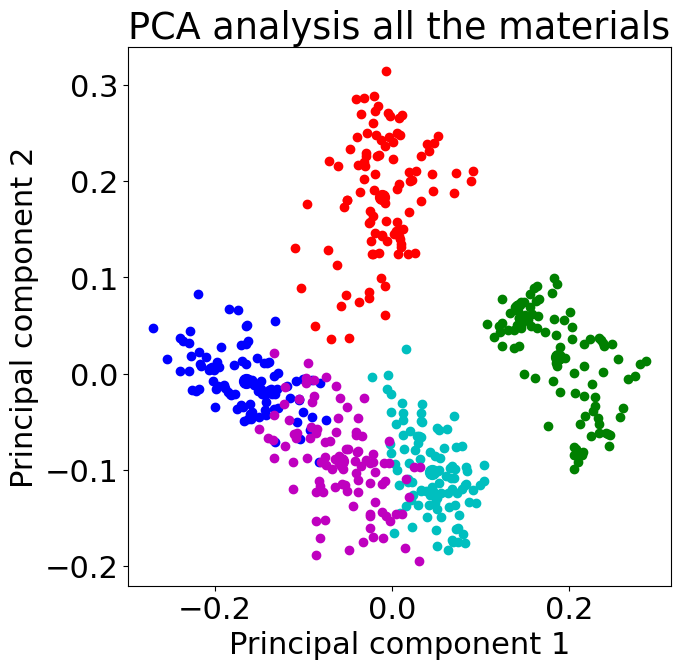

In [226]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)
targets = list(range(1,6))
centers = []
for target in targets:
    itk = y == target
    centers.append(pca_data[itk].mean(axis=0))
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(7,7))
targets = list(range(1,6))
labelss = ['Acetone', 'Benzene', 'Methanol', 'Ethanol', 'Isopropanol']
colors = ['r', 'g', 'b','c','m']
for target, color, label, center in zip(targets, colors, labelss, centers):
    itk = y == target
    plt.scatter(pca_data[itk, 0], pca_data[itk, 1], c=color)
    plt.scatter(center[0], center[1], s=100, c=color,label=label)
    pd.DataFrame(pca_data[itk]).to_csv(f'PCA_plots/Most_important/{label}.csv')
    # plt.text(center[0], center[1], label)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('PCA analysis all the materials')
# plt.legend()
# plt.legend(loc="lower left", fontsize=10)
plt.show()

In [230]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
cumulative_explained_variance

array([0.34115321, 0.63537007])

In [231]:
pca.explained_variance_ratio_.sum()

0.6353700687231378

Mean Feature Importances: [9.12659769e-05 2.85221685e-03 7.69188003e-05 8.33496975e-02
 6.06035890e-02 9.24182070e-02 5.79762435e-02 5.97383990e-02
 5.42946980e-02 6.66256539e-03 1.12745654e-01 6.57723971e-02
 6.28734166e-02 8.84899146e-02 1.14395237e-01 2.81167007e-03
 5.10676068e-02 1.15010313e-03 6.97921928e-02 1.28380063e-02]
Std Feature Importances: [8.15154681e-05 1.10464050e-03 1.39472731e-05 3.33598019e-03
 1.75294066e-03 7.01689043e-03 3.37038305e-03 5.87652362e-03
 2.22356947e-03 8.53053660e-04 1.63591283e-03 1.59472087e-03
 3.65403254e-03 3.29562372e-03 3.64214865e-03 9.42963435e-04
 4.22485177e-03 6.73133887e-04 9.67464552e-04 1.41016596e-03]


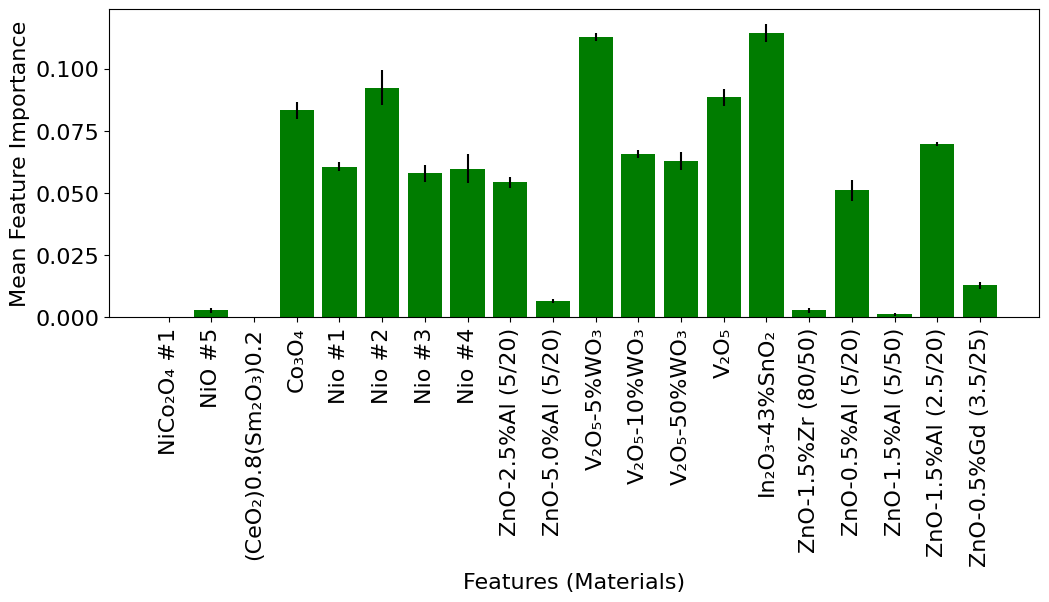

In [233]:
feature_importances_per_fold = []
for train_idx, test_idx in StratifiedKFold(n_splits=5, shuffle=True, random_state=69).split(X, y):
    X_train, X_test = np.array(X)[train_idx], np.array(X)[test_idx]
    y_train, y_test = np.array(y)[train_idx], np.array(y)[test_idx]
    model.fit(X_train, y_train)
    feature_importances_per_fold.append(model.feature_importances_)

feature_importances_per_fold = np.array(feature_importances_per_fold)
mean_feature_importances = np.mean(feature_importances_per_fold, axis=0)
std_feature_importances = np.std(feature_importances_per_fold, axis=0)

print("Mean Feature Importances:", mean_feature_importances)
print("Std Feature Importances:", std_feature_importances)
plt.rcParams.update({'font.size':16})
plt.figure(figsize=(12,4))
mats = np.array([
    'NiCo\u2082O\u2084 #1',
'NiO #5',
'(CeO\u2082)0.8(Sm\u2082O\u2083)0.2',
'Co\u2083O\u2084',
'Nio #1',
'Nio #2',
'Nio #3',
'Nio #4',
'ZnO-2.5%Al (5/20)',
'ZnO-5.0%Al (5/20)',
'V\u2082O\u2085-5%WO\u2083',
'V\u2082O\u2085-10%WO\u2083',
'V\u2082O\u2085-50%WO\u2083',
'V\u2082O\u2085',
'In\u2082O\u2083-43%SnO\u2082',
'ZnO-1.5%Zr (80/50)',
'ZnO-0.5%Al (5/20)',
'ZnO-1.5%Al (5/50)',
'ZnO-1.5%Al (2.5/20)',
'ZnO-0.5%Gd (3.5/25)'])
plt.bar(mats, mean_feature_importances, yerr=std_feature_importances, align="center", color='#007c00')
# plt.bar(mean_feature_importances, mats, xerr=std_feature_importances, align="center")
plt.xlabel('Features (Materials)')
plt.ylabel('Mean Feature Importance')
# plt.title('Feature Importance of all the materials')
plt.xticks(rotation=90)
plt.show()

In [239]:
sorted = mean_feature_importances.copy()
sorted.sort()
sorted = sorted[::-1]
sorted[:9]

array([0.11439524, 0.11274565, 0.09241821, 0.08848991, 0.0833497 ,
       0.06979219, 0.0657724 , 0.06287342, 0.06060359])

In [240]:
idx = [i for i in range(20) if mean_feature_importances[i] in sorted[:9]]
materials = np.array(new_columns)[idx]
materials

array(['coo', 'nio1', 'nio2', 'v2o55', 'v2o510', 'v2o550', 'v2o5', 'ito',
       'azo7'], dtype='<U6')

In [241]:
idx

[3, 4, 5, 10, 11, 12, 13, 14, 18]

Mean Feature Importances: 0.08334969752323088
Std Feature Importances: [0.00333598 0.00175294 0.00701689 0.00163591 0.00159472 0.00365403
 0.00329562 0.00364215 0.00096746]


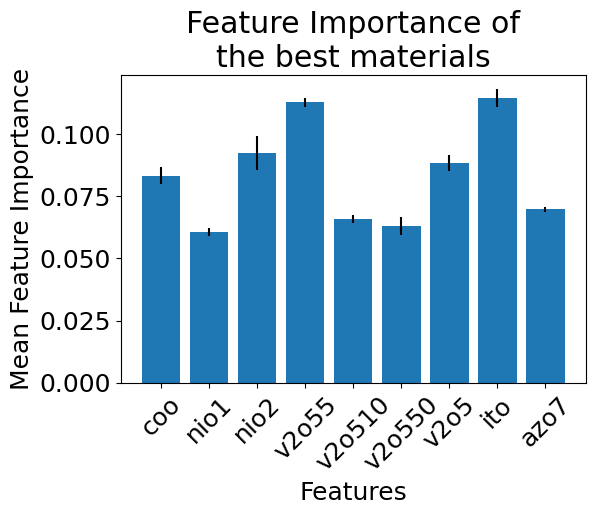

In [242]:
idx = [i for i in range(20) if new_columns[i] in materials]
best_fimp = mean_feature_importances[idx]
print("Mean Feature Importances:", np.median(mean_feature_importances[idx]))
print("Std Feature Importances:", std_feature_importances[idx])
plt.figure(figsize=(6,4))
plt.rcParams.update({'font.size':18})
plt.bar(materials, mean_feature_importances[idx], yerr=std_feature_importances[idx], align="center")
plt.xlabel('Features')
plt.ylabel('Mean Feature Importance')
plt.title('Feature Importance of\nthe best materials')
plt.xticks(rotation=45)
plt.show()

In [243]:
materials

array(['coo', 'nio1', 'nio2', 'v2o55', 'v2o510', 'v2o550', 'v2o5', 'ito',
       'azo7'], dtype='<U6')

In [244]:
mats[idx]

array(['Co₃O₄', 'Nio #1', 'Nio #2', 'V₂O₅-5%WO₃', 'V₂O₅-10%WO₃',
       'V₂O₅-50%WO₃', 'V₂O₅', 'In₂O₃-43%SnO₂', 'ZnO-1.5%Al (2.5/20)'],
      dtype='<U19')

In [245]:
mean_feature_importances[idx]

array([0.0833497 , 0.06060359, 0.09241821, 0.11274565, 0.0657724 ,
       0.06287342, 0.08848991, 0.11439524, 0.06979219])

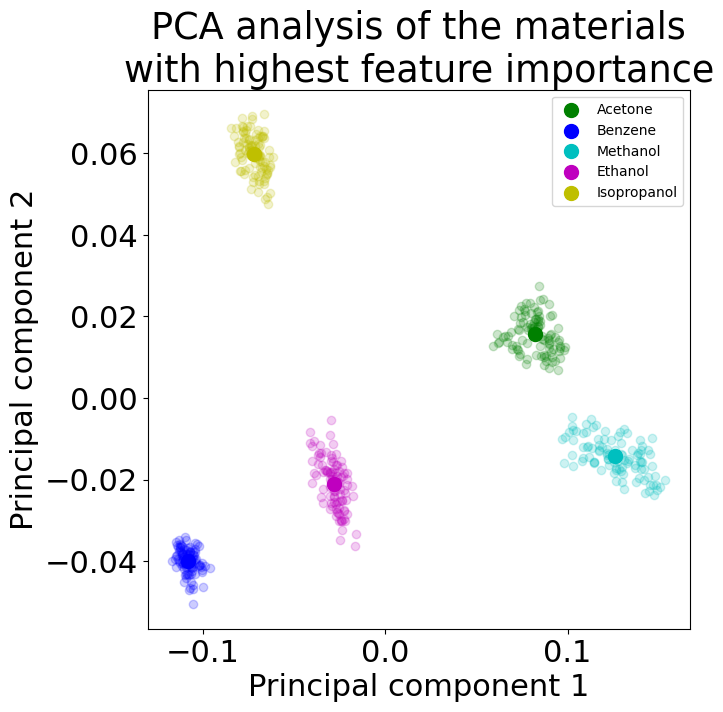

In [247]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X[materials])
targets = list(range(1, 6))
centers = []
for target in targets:
    itk = y == target
    centers.append(pca_data[itk].mean(axis=0))
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(7,7))
targets = list(range(1, 6))
labelss = ['Acetone', 'Benzene', 'Methanol', 'Ethanol', 'Isopropanol']
colors = ['g', 'b','c','m','y']
for target, color, label, center in zip(targets, colors, labelss, centers):
    itk = y == target
    plt.scatter(pca_data[itk, 0], pca_data[itk, 1], c=color, alpha=0.2)
    plt.scatter(center[0], center[1], s=100, c=color,label=label)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('PCA analysis of the materials\nwith highest feature importance')
plt.legend(loc="upper right", fontsize=10)
plt.show()

In [248]:
import numpy as np
from scipy.spatial.distance import cdist

coordinates_array = np.array(centers)

# Calculate pairwise distances
distances = cdist(coordinates_array, coordinates_array, metric='euclidean')

# Print the pairwise distances
print("Pairwise Distances: best features")
print(distances)

Pairwise Distances: best features
[[0.         0.19801981 0.05332332 0.11622287 0.16013673]
 [0.19801981 0.         0.23563379 0.08198213 0.10607807]
 [0.05332332 0.23563379 0.         0.15460968 0.21147797]
 [0.11622287 0.08198213 0.15460968 0.         0.09183311]
 [0.16013673 0.10607807 0.21147797 0.09183311 0.        ]]


In [249]:
np.median(distances)

0.10607807189952946

## Best combination

In [253]:
X = whole_data[['nio1', 'nio5', 'nico', 'v2o550', 'azo50', 'azo25', 'v2o5', 'v2o510', 'ito']]
y = whole_data.gas
X_train, X_test, y_train, y_test = train_test_split(X, np.array(y), test_size=0.5, stratify=y)

f_imps = []

for i in range(10):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(balanced_accuracy_score(preds, y_test))
    f_imp = model.feature_importances_
    f_imps.append(f_imp)

f_imps = np.array(f_imps)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


Mean Feature Importances: [9.12659769e-05 2.85221685e-03 6.06035890e-02 5.42946980e-02
 6.66256539e-03 6.57723971e-02 6.28734166e-02 8.84899146e-02
 1.14395237e-01]
Std Feature Importances: [8.15154681e-05 1.10464050e-03 1.75294066e-03 2.22356947e-03
 8.53053660e-04 1.59472087e-03 3.65403254e-03 3.29562372e-03
 3.64214865e-03]


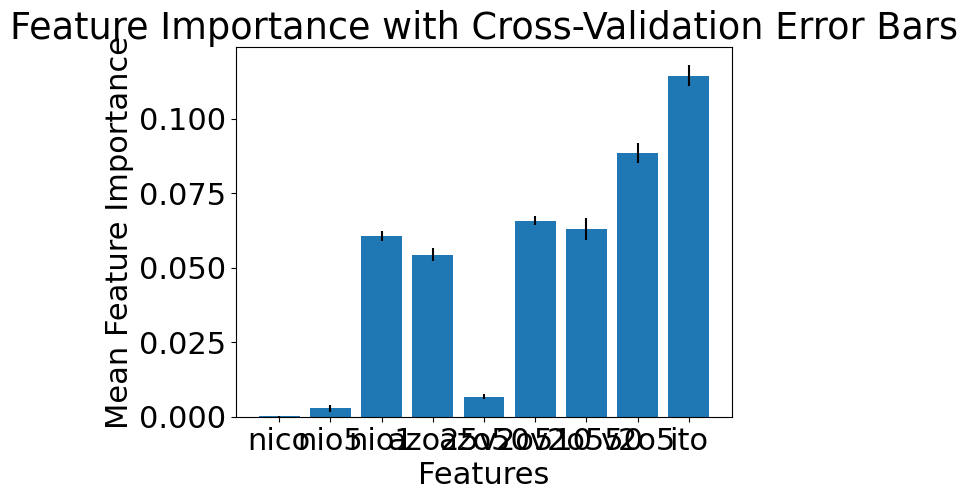

In [254]:
X = whole_data[['nio1', 'nio5', 'nico', 'v2o550', 'azo50', 'azo25', 'v2o5', 'v2o510', 'ito']]
y = whole_data.gas

idx = [i for i in range(20) if new_columns[i] in ['nio1', 'nio5', 'nico', 'v2o550', 'azo50', 'azo25', 'v2o5', 'v2o510', 'ito']]


print("Mean Feature Importances:", mean_feature_importances[idx])
print("Std Feature Importances:", std_feature_importances[idx])

plt.bar(np.array(new_columns)[idx], mean_feature_importances[idx], yerr=std_feature_importances[idx], align="center")
plt.xlabel('Features')
plt.ylabel('Mean Feature Importance')
plt.title('Feature Importance with Cross-Validation Error Bars')
plt.show()

In [255]:
np.median(mean_feature_importances[idx])

0.060603588950185514

In [256]:
mats[idx]

array(['NiCo₂O₄ #1', 'NiO #5', 'Nio #1', 'ZnO-2.5%Al (5/20)',
       'ZnO-5.0%Al (5/20)', 'V₂O₅-10%WO₃', 'V₂O₅-50%WO₃', 'V₂O₅',
       'In₂O₃-43%SnO₂'], dtype='<U19')

In [257]:
mean_feature_importances[idx]

array([9.12659769e-05, 2.85221685e-03, 6.06035890e-02, 5.42946980e-02,
       6.66256539e-03, 6.57723971e-02, 6.28734166e-02, 8.84899146e-02,
       1.14395237e-01])

In [259]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

In [260]:
targets = list(range(1, 6))
centers = []
for target in targets:
    itk = y == target
    centers.append(pca_data[itk].mean(axis=0))

In [261]:
import numpy as np
from scipy.spatial.distance import cdist

coordinates_array = np.array(centers)

# Calculate pairwise distances
distances = cdist(coordinates_array, coordinates_array, metric='euclidean')

# Print the pairwise distances
print("Pairwise Distances:")
print(distances)

Pairwise Distances:
[[0.         0.24578415 0.2451209  0.2681891  0.26562967]
 [0.24578415 0.         0.32386797 0.1802816  0.22423832]
 [0.2451209  0.32386797 0.         0.18431383 0.13674596]
 [0.2681891  0.1802816  0.18431383 0.         0.05150246]
 [0.26562967 0.22423832 0.13674596 0.05150246 0.        ]]


In [262]:
np.median(distances)

0.1843138331019273

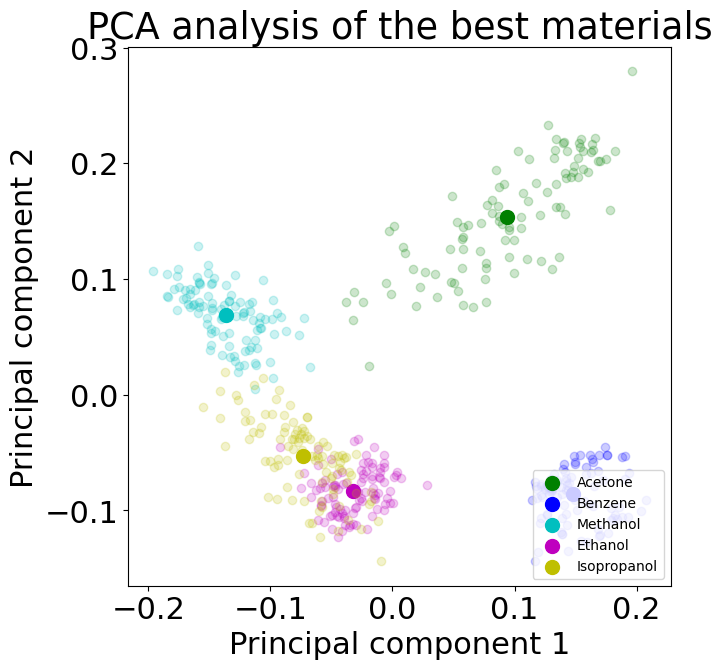

In [264]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(7,7))
targets = list(range(1, 6))
labelss = ['Acetone', 'Benzene', 'Methanol', 'Ethanol', 'Isopropanol']
colors = ['g', 'b','c','m','y']
for target, color, label, center in zip(targets, colors, labelss, centers):
    itk = y == target
    plt.scatter(pca_data[itk, 0], pca_data[itk, 1], c=color, alpha=0.2)
    plt.scatter(center[0], center[1], s=100, c=color,label=label)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('PCA analysis of the best materials')
plt.legend(loc="lower right", fontsize=10)
plt.show()

## Worst combination

In [266]:
X = whole_data[['coo', 'nio4', 'v2o5', 'v2o510', 'v2o55', 'azo6', 'azo7', 'gzo21', 'azo1']]
y = whole_data.gas
X_train, X_test, y_train, y_test = train_test_split(X, np.array(y), test_size=0.5, stratify=y)
model = RandomForestClassifier()
model.fit(X_train, y_train)
report = classification_report(y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        50
         2.0       1.00      1.00      1.00        50
         3.0       1.00      1.00      1.00        50
         4.0       1.00      1.00      1.00        50
         5.0       1.00      1.00      1.00        50

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



Mean Feature Importances: [0.0833497  0.0597384  0.11274565 0.0657724  0.08848991 0.05106761
 0.0011501  0.06979219 0.01283801]
Std Feature Importances: [0.00333598 0.00587652 0.00163591 0.00159472 0.00329562 0.00422485
 0.00067313 0.00096746 0.00141017]


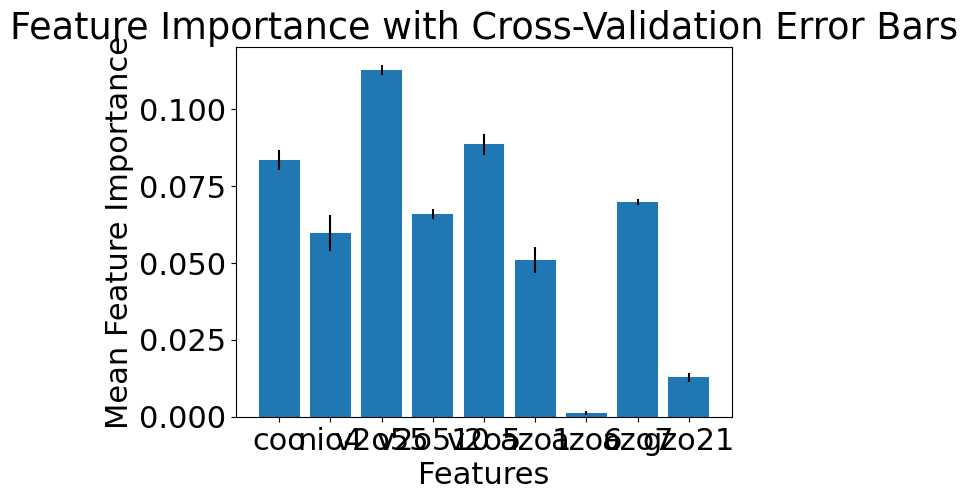

In [267]:
X = whole_data[['coo', 'nio4', 'v2o5', 'v2o510', 'v2o55', 'azo7', 'azo6', 'gzo21', 'azo1']]
y = whole_data.gas

idx = [i for i in range(20) if new_columns[i] in ['coo', 'nio4', 'v2o5', 'v2o510', 'v2o55', 'azo7', 'azo6', 'gzo21', 'azo1']]


print("Mean Feature Importances:", mean_feature_importances[idx])
print("Std Feature Importances:", std_feature_importances[idx])

plt.bar(np.array(new_columns)[idx], mean_feature_importances[idx], yerr=std_feature_importances[idx], align="center")
plt.xlabel('Features')
plt.ylabel('Mean Feature Importance')
plt.title('Feature Importance with Cross-Validation Error Bars')
plt.show()

In [268]:
mats[idx]

array(['Co₃O₄', 'Nio #4', 'V₂O₅-5%WO₃', 'V₂O₅-10%WO₃', 'V₂O₅',
       'ZnO-0.5%Al (5/20)', 'ZnO-1.5%Al (5/50)', 'ZnO-1.5%Al (2.5/20)',
       'ZnO-0.5%Gd (3.5/25)'], dtype='<U19')

In [269]:
mean_feature_importances[idx]

array([0.0833497 , 0.0597384 , 0.11274565, 0.0657724 , 0.08848991,
       0.05106761, 0.0011501 , 0.06979219, 0.01283801])

In [271]:
np.median(mean_feature_importances)

0.058857321269347854

In [272]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)
targets = list(range(1, 6))
centers = []
for target in targets:
    itk = y == target
    centers.append(pca_data[itk].mean(axis=0))

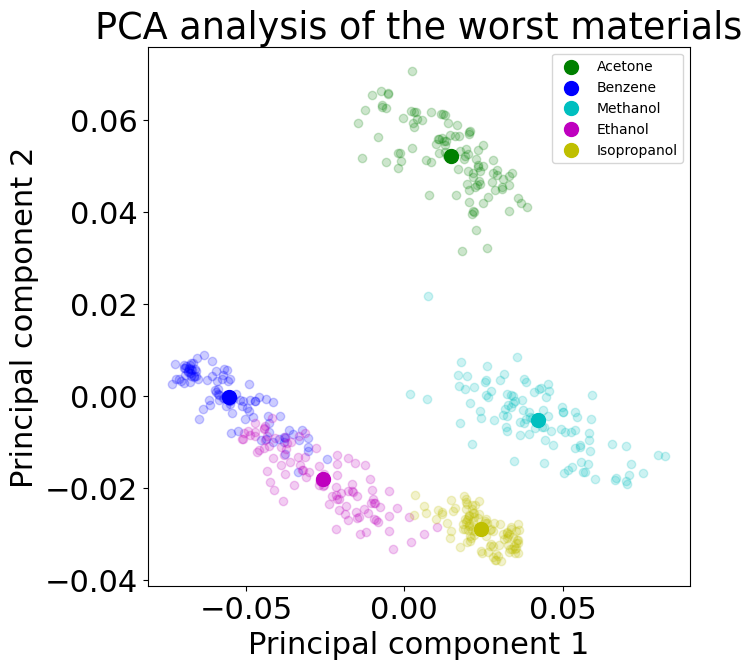

In [273]:

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(7,7))
targets = list(range(1,6))
labelss = ['Acetone', 'Benzene', 'Methanol', 'Ethanol', 'Isopropanol']
colors = ['g', 'b','c','m','y']
for target, color, label, center in zip(targets, colors, labelss, centers):
    itk = y == target
    plt.scatter(pca_data[itk, 0], pca_data[itk, 1], c=color, alpha=0.2)
    plt.scatter(center[0], center[1], s=100, c=color,label=label)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('PCA analysis of the worst materials')
plt.legend(loc="upper right", fontsize=10)
plt.show()

In [274]:
import numpy as np
from scipy.spatial.distance import cdist

coordinates_array = np.array(centers)

# Calculate pairwise distances
distances = cdist(coordinates_array, coordinates_array, metric='euclidean')

# Print the pairwise distances
print("Pairwise Distances:")
print(distances)

Pairwise Distances:
[[0.         0.08752082 0.06363098 0.0809502  0.08165983]
 [0.08752082 0.         0.09782866 0.03443782 0.08479298]
 [0.06363098 0.09782866 0.         0.06932345 0.02974631]
 [0.0809502  0.03443782 0.06932345 0.         0.05142741]
 [0.08165983 0.08479298 0.02974631 0.05142741 0.        ]]


In [275]:
np.median(distances)

0.06363097557324053

In [317]:
distances = []
for i in range(5):
    distances.append(np.sqrt((centers[i][0]-centers[0][0])**2+(centers[i][1]-centers[0][1])**2))
np.median(distances)

0.08095019510480735